<a href="https://colab.research.google.com/github/FolarinJoaquim/ADHD-Project-Implementation/blob/main/Final_Project_Code_Draft_03092025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/FolarinJoaquim/ADHD-Project-Implementation.git

Cloning into 'ADHD-Project-Implementation'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 20 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 45.51 KiB | 2.07 MiB/s, done.
Resolving deltas: 100% (7/7), done.




---


# **Importing the Necessary Libraries for Project**

> a. Installing the required libraries. <br>
> b. Calling the imported libraries as well as other embedded libraries in Python <br>

In [1]:
pip install --upgrade numpy gensim

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
    Uninstalling numpy-2.3.3:
      Successfully uninstalled numpy-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible

In [2]:
# !pip install praw

In [3]:
!pip install tensorflow

In [1]:
!pip install spacy
!pip install spacy-transformers
!python -m spacy download en_core_web_trf
!python -m spacy download en_core_web_md

/usr/local/lib/python3.12/dist-packages/cupyx/scipy/sparse/_base.py:10: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  import scipy.sparse as _sparse
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 1.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
/usr/local/lib/python3.12/dist-packages/cupyx/scipy/sparse/_base.py:10: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  import scipy.sparse as _sparse
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 35.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package

In [5]:
# !pip install numpy==1.24.3 nltk==3.8.1 scikit-learn==1.3.2 tensorflow==2.13.0



---


**Importing Libraries**

In [2]:
import praw
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

import spacy
import torch

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon') # Added for SIA

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


---


# **Setting Up Reddit API for Web Scrapping**
Using the generate client ID and secret key to scrape subreddit data
> a. Using the r/ADHD, r/ADHDwomen, r/ADHDmen, etc. <br>
> b. Pulling the title, comment/post, author and url of each content. <br>
> c. Reading the data to a dataframe and saving to a .csv file. <br>

In [6]:
# Load the saved CSV file back into a DataFrame
df_loaded = pd.read_csv('adhd_subreddits_2019_2024(1).csv')

# Display the first few rows to confirm it loaded correctly
display(df_loaded.head())



---


# **Calling the reddit .csv file for further labelling**
Using the generate client ID and secret key to scrape subreddit data
> a. Using the r/ADHD, r/ADHDwomen, r/ADHDmen, etc. <br>
> b. Pulling the title, comment/post, author and url of each content. <br>
> c. Reading the data to a dataframe and saving to a .csv file. <br>

In [7]:
sia = SIA()

In [8]:
def csv_read(file_path):
    """Reads a CSV file into a pandas DataFrame with error handling."""
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return None
    except Exception as e:
        print(f"An error occurred while reading '{file_path}': {e}")
        return None


df = csv_read('ADHD.csv')
if df is not None:
    display(df)

title                author  \
0        Do not ask for medical advice. No exceptions.             nerdshark   
1    Need to get something off your chest? Rant, ve...         AutoModerator   
2                        ADHD and not doing the dishes             fedenrico   
3    Sat through a 1-hour meeting… all I have is a ...        GcNiceKick8846   
4    I need your tips no matter how unhinged on how...    Grouchy-Archer3034   
..                                                 ...                   ...   
566                            Help with jaw clenching  Cute_Psychology_3016   
567  Struggling with Vyvanse abuse and considering ...          iNtpeeludajm   
568                 Need help reading "boring" article                   NaN   
569             Meds don't feel the same after a break               mobofob   
570      Stuggling with House maintenance / decorating         the_star_lord   

                                               content  \
0    Since nobody reads the rules, maybe this post ...   
1    Get those hard feelings off your chest here. P...   
2    Hi. My flatmate refuses to do the dishes using...   
3    So I’ll be real every single time I sit throug...   
4    I have 4 uni assignments and I am currently in...   
..                                                 ...   
566  I have severe adhd and I cannot take any stimu...   
567  \nI’ve been on Vyvanse for almost 3 years now....   
568  Quotations, because "boring" is subjective. I ...   
569  I took a break because my sleep schedule was s...   
570  Hi all so I'm mid 30s and recently diagnosed b...   

                                                   url  
0    https://www.reddit.com/r/ADHD/comments/1i9fb18...  
1    https://www.reddit.com/r/ADHD/comments/1n5eqqw...  
2    https://www.reddit.com/r/ADHD/comments/1n6i2od...  
3    https://www.reddit.com/r/ADHD/comments/1n6gsmx...  
4    https://www.reddit.com/r/ADHD/comments/1n6ifi4...  
..                                                 ...  
566  https://www.reddit.com/r/ADHD/comments/1n28ggx...  
567  https://www.reddit.com/r/ADHD/comments/1n1zs55...  
568  https://www.reddit.com/r/ADHD/comments/1n2g908...  
569  https://www.reddit.com/r/ADHD/comments/1n2g7q3...  
570  https://www.reddit.com/r/ADHD/comments/1n2g6we...  

[571 rows x 4 columns]

In [9]:
results = []

for line in df["content"]:
    pol_score = sia.polarity_scores(line)
    pol_score['content'] = line # Store the content in the dictionary
    results.append(pol_score)

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Access and print the desired column
display(results_df)

neg    neu    pos  compound  \
0    0.018  0.916  0.067    0.7921   
1    0.253  0.591  0.156   -0.9689   
2    0.140  0.761  0.100   -0.6485   
3    0.027  0.790  0.183    0.9845   
4    0.202  0.784  0.014   -0.9430   
..     ...    ...    ...       ...   
566  0.251  0.749  0.000   -0.9471   
567  0.083  0.835  0.082   -0.1556   
568  0.159  0.743  0.098   -0.8596   
569  0.030  0.847  0.123    0.9229   
570  0.170  0.786  0.044   -0.9904   

                                               content  
0    Since nobody reads the rules, maybe this post ...  
1    Get those hard feelings off your chest here. P...  
2    Hi. My flatmate refuses to do the dishes using...  
3    So I’ll be real every single time I sit throug...  
4    I have 4 uni assignments and I am currently in...  
..                                                 ...  
566  I have severe adhd and I cannot take any stimu...  
567  \nI’ve been on Vyvanse for almost 3 years now....  
568  Quotations, because "boring" is subjective. I ...  
569  I took a break because my sleep schedule was s...  
570  Hi all so I'm mid 30s and recently diagnosed b...  

[571 rows x 5 columns]

In [10]:
'''
Assigning labels based on the compound score
'''
results_df['sentiment'] = 'neutral'
results_df.loc[results_df['compound'] > 0.5, 'sentiment'] = 'positive'
results_df.loc[results_df['compound'] < -0.5, 'sentiment'] = 'negative'
results_df.head()

neg    neu    pos  compound  \
0  0.018  0.916  0.067    0.7921   
1  0.253  0.591  0.156   -0.9689   
2  0.140  0.761  0.100   -0.6485   
3  0.027  0.790  0.183    0.9845   
4  0.202  0.784  0.014   -0.9430   

                                             content sentiment  
0  Since nobody reads the rules, maybe this post ...  positive  
1  Get those hard feelings off your chest here. P...  negative  
2  Hi. My flatmate refuses to do the dishes using...  negative  
3  So I’ll be real every single time I sit throug...  positive  
4  I have 4 uni assignments and I am currently in...  negative

In [11]:
'''
Storing the results of the assingment and dataframe into a new .csv file
'''
results_df.to_csv('reddit_content_labels.csv', encoding='utf-8', index=False)

In [12]:
results_df.value_counts('sentiment')

sentiment
positive    254
negative    177
neutral     140
Name: count, dtype: int64

In [13]:
results_df.value_counts('sentiment', normalize=True)*100

sentiment
positive    44.483363
negative    30.998249
neutral     24.518389
Name: proportion, dtype: float64

In [14]:
print("Positive headlines:\n")
display(list(results_df[results_df['sentiment'] == 'positive'].content)[2:5], '\n')
print("Neutral headlines:\n")
display(list(results_df[results_df['sentiment'] == 'neutral'].content)[2:5], '\n')
print("Negative headlines:\n")
display(list(results_df[results_df['sentiment'] == 'negative'].content)[2:5], '\n')

Positive headlines:



["This all happened in ONE week. ONE week. My boss doesn't even know I'm heading to another country, and I know she'll be so pissed when she hears about it and I'll be fired. I'm technically still employed. Haven't got another job lined up. Don't know if I'll get into the studies I applied for. But I have savings to last me a couple months.\n\nI'll admit, that this time, the first time in several years, I acted on my true ADHD instincts and just.. left. Do you guys have any similar stories? If so, now is the time to share.\n\nCheers. ",
 'My diagnosing psychiatrist had authorised my GP to take over care and prescribe meds (lisdexamphetamine).  I’ve nearly reached the end of my last prescription repeat, so contacted my GP who advised me the authorisation is expired and I need to see the psychiatrist for review and a new authorisation. \n\nBoth phone numbers disconnected, web page says he’s on leave through 2025… quick Google search shows up that he has undertaken to not practice as a me

'\n'

Neutral headlines:



["I have a bad habit of going all-out whenever I have productive feelings and motivation, and then I burn myself out and feel like I can't do anything for several days. I also will go until physically exhausted. What are some recommendations on how I can pace myself? I just get focused on completing things that need done or that I want to do, and I end up overdoing it.\nI could really use some advice, my poor brain works in all-or-nothing. \nThanks!",
 'Is anyone else having trouble getting their Addderall prescription filled? My pharmacy hasn’t had it in stock for the last 5 days and I’ve been out of meds since then. 1-2 days is fine, but at this point I feel like yeeting myself out a window. My mind is going nonstop but can’t focus on anything.\n\nLast month there was a delay of 2-3 days. The pharmacy didn’t have any info for me but made it sound like all Walgreens are experiencing a problem getting Adderall from the manufacturer.\n\nIs this a real problem? Back to school rush?\n\nI 

'\n'

Negative headlines:



["I have 4 uni assignments and I am currently in a loop of getting extensions, having them moved to the next exam period which means I no longer have the fear or pressure to actually do the assignments. I'm sick of it! Just want to be done with my masters so now need your tips and tricks on getting yourself to focus so I can finish the thing! I've tried the whole timer thing and music thing and it ain't working! Thanks all! I'm desperate! ",
 "I've always been an introvert, and barely had any memorable moments or fun times with friends. Not that I didn't have friends at all, but when I was doing my undergrad degree, my father was very controlling and conservative about hanging out for too long or going out for long distances. So I progressively started staying home longer.\n\nThen I moved out and started staying on my own. Did my masters, lived with roommates-- didn't enjoy going out. But somewhere deep inside I wanted to have fun? It was this weird dichotomy I never understood. It con

'\n'

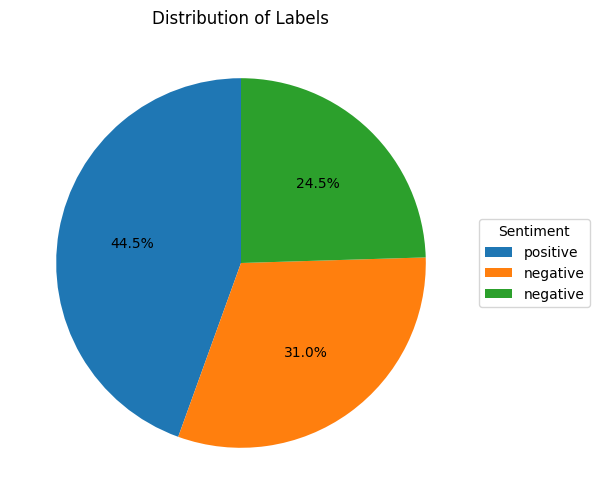

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
counts = results_df['sentiment'].value_counts(normalize=True) * 100

# Plot the pie chart
wedges, texts, autotexts = ax.pie(counts, autopct='%1.1f%%', startangle=90)
ax.set_title('Distribution of Labels')

# Add labels to the pie segments
ax.legend(wedges, results_df['sentiment'], title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [16]:
results_df = results_df.drop(columns=['compound', 'neg', 'neu', 'pos'])
display(results_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    571 non-null    object
 1   sentiment  571 non-null    object
dtypes: object(2)
memory usage: 9.1+ KB


None


---


# **Data Cleaning and Preparation**
Using the newly generated .csv file with the reddit content labels, we shall conduct cleaning on the scrapped content which includes:
> a. Converting texts to string and transforming content to lowercase for consistency. <br>
> b. Removing URLs, HTML tags, Emojis, Punctuation marks, etc. <br>
> c. Stop word removal. <br>
> d. Tokenisation, Stemming and Lemmitisation. <br>

In [17]:
# stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

---

### **Extracting Emojis and Emoticons**

In [18]:
# Define common emoticons
EMOTICON_PATTERN = re.compile(r"""
    (\s|^)          # Start with space or beginning of string
    ([:;xX=]-?[)D(pP\/(])  # Typical emoticons with optional nose (-)
    (\s|$)          # End with space or end of string
""", re.VERBOSE)

In [19]:
def extract_emoticons(text):
    return [match[1] for match in EMOTICON_PATTERN.findall(text)]

In [20]:
emoji_list = []

for post in results_df['content']:
    emoticons = extract_emoticons(post)
    if len(emoticons) > 0:
        emoji_list.append(emoticons)
print(emoji_list)

[[':('], [':)'], [':)'], [':)'], [':/', ':('], [':)'], [':('], [':('], [':/'], [':-('], [':)'], [':)'], [':)', ':)'], [':-)'], [':('], [':('], [':(', ':('], [':)', ':)'], [':(']]


In [21]:
EMOTICON_MAP = {
    ":)": "happyface",
    ":-)": "happyface",

    ":-D": "bigsmile",
    ":D": "bigsmile",
    "=D": "bigsmile",
    "=-D": "bigsmile",

    "xD": "laughingface",
    "XD": "laughingface",


    ":-P": "tongueoutface",
    ":-p": "tongueoutface",
    ":p": "tongueoutface",
    ":P": "tongueoutface",
    "=-P": "tongueoutface",
    "=-p": "tongueoutface",
    "=P": "tongueoutface",
    "=p": "tongueoutface",


    ":-/": "uncertainface",
    ":/": "uncertainface",
    "=-/": "uncertainface",
    "=/": "uncertainface",

    "X)": "grinningface",
    "x)": "grinningface",
    "X-)": "grinningface",
    "x-)": "grinningface",

    "XP": "playfultongueface",
    "xP": "playfultongueface",
    "X-P": "playfultongueface",
    "x-P": "playfultongueface",

    ";p": "winkingtongueoutface",
    ";P": "winkingtongueface",

    ";-)": "winkingface",
    ";)": "winkingface",
    ";)": "winkingface",

    ";D": "bigwinksmile",
    ";-D": "bigwinksmile",

    ";(": "sadwinkingface",
    ";-(": "sadwinkingface",

    ":-(": "sadface",
    "=-(": "sadface",
    ":(": "sadface",
    "=(": "sadface",
}

In [22]:
def emoji_replace(text):
    def replace_match(match):
        emoticon = match.group(2)  # Extract only the emoticon part
        return match.group(1) + EMOTICON_MAP.get(emoticon, emoticon) + match.group(3)  # Preserve spacing

    return EMOTICON_PATTERN.sub(replace_match, str(text))

In [23]:
results_df['cleaned_text'] = results_df['content'].apply(emoji_replace)

---

### **Character Cleaning**

In [24]:
"""
Create a clean_data column and to store clean version of text column
Convert the cleaned_data column to string and transform to lower case
"""
results_df['cleaned_text'] = results_df['cleaned_text'].astype(str).apply(lambda x: x.lower())

In [25]:
from bs4 import BeautifulSoup
import string

def data_cleaning(text):
    text = str(text).lower() # converts to lower case
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', str(text)) # Removes URLs starting with http, https, or www.
    text = re.sub(r'r/\S+|u/\S+', '', text) # Removes Reddit subreddit and user tags (r/ and u/)
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces, newlines (\n), and tabs (\t)
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters except spaces
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Removes all punctuation marks from the text. string.punctuation and re.escape() is used to escape any special characters in the punctuation string
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub('[,\.?!]', '', text)


    return text.strip()  # Remove leading/trailing whitespaces

In [26]:
results_df['content'][60]

'I (30M) am returning to school. I loved what I was doing, but the industry changed a lot during COVID and it really destroyed my career. It’s sad, but it is what it is.\n\nI wasn’t diagnosed until I was 25, and because of this, this will be my first time in school with an understanding of maybe why school was often so difficult for me.\n\nAt the same time, because this is my first time in school with a diagnosis, I’m not entirely sure what kind of accommodations I should be asking for. In reality, I know that my biggest downfall was always homework. I would ace tests, but never do homework, which of course would fuck over my grades. It’s clear looking back that the classes I did the best in were ones either without homework, or classes where I was able to finish it during class time.\n\nMaybe there’s another route about this. But regardless, what kind of accommodations should I be looking for? What has helped you? Of course it isn’t a one size fits all, but maybe some ideas will help 

In [27]:
results_df['cleaned_text'] = results_df['content'].apply(data_cleaning)

In [28]:
results_df['cleaned_text'][60]

'i m am returning to school i loved what i was doing but the industry changed a lot during covid and it really destroyed my career its sad but it is what it is i wasnt diagnosed until i was  and because of this this will be my first time in school with an understanding of maybe why school was often so difficult for me at the same time because this is my first time in school with a diagnosis im not entirely sure what kind of accommodations i should be asking for in reality i know that my biggest downfall was always homework i would ace tests but never do homework which of course would fuck over my grades its clear looking back that the classes i did the best in were ones either without homework or classes where i was able to finish it during class time maybe theres another route about this but regardless what kind of accommodations should i be looking for what has helped you of course it isnt a one size fits all but maybe some ideas will help me understand better what i could try and as

---

### **Tokenisation and Lemmatisation**

In [29]:
# Define the list(dictionary) of negation words to be removed
negation = {"aren", "aren't", "couldn'", "couldn't", "didn", "didn't", "doesn", "doesn't"
            "don", "don't", "hadn", "hadn't", 'hasn', "hasn't", "haven", "haven't", 'isn',
            "isn't", "not", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn',
            "wouldn't"}

# Remove negation words from stopwords
stop_words -= negation

In [30]:
def remove_stopwords(text):
     text = [word for word in text.split(' ') if word not in stop_words] # Splits words if word not a stop word
     text = " ".join(text) # Joins the list of words back into a single string
     return text.strip()  # Remove leading/trailing whitespaces

In [31]:
results_df['cleaned_text'] = results_df['cleaned_text'].apply(remove_stopwords)
results_df['cleaned_text'][60]

'returning school loved industry changed lot covid really destroyed career sad wasnt diagnosed  first time school understanding maybe school often difficult time first time school diagnosis im not entirely sure kind accommodations asking reality know biggest downfall always homework would ace tests never homework course would fuck grades clear looking back classes best ones either without homework classes able finish class time maybe theres another route regardless kind accommodations looking helped course isnt one size fits maybe ideas help understand better could try ask'

In [32]:
# tokenizing the words
nltk.download('punkt_tab')

results_df['token_content'] = results_df['cleaned_text'].apply(lambda post: word_tokenize(post))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [33]:
results_df['token_content']

0      [since, nobody, reads, rules, maybe, post, eas...
1      [get, hard, feelings, chest, please, remember,...
2      [hi, flatmate, refuses, dishes, using, adhd, r...
3      [ill, real, every, single, time, sit, meeting,...
4      [uni, assignments, currently, loop, getting, e...
                             ...                        
566    [severe, adhd, can, not, take, stimulants, due...
567    [ive, vyvanse, almost, years, started, mg, upp...
568    [quotations, boring, subjective, dont, think, ...
569    [took, break, sleep, schedule, messed, didnt, ...
570    [hi, im, mid, recently, diagnosed, not, yet, m...
Name: token_content, Length: 571, dtype: object

In [34]:
def stemm_lemm(text):
    # text is already a list of tokens, no need to split
    text = [lemmatizer.lemmatize(word) for word in text] # Lemmatizes each word in the list.
    text = " ".join(text) # Joins the list of lemmatized words back into a single string
    return text.strip()  # Remove leading/trailing whitespaces

In [35]:
results_df['lemm_token'] = results_df['token_content'].apply(stemm_lemm)

results_df['lemm_token']

0      since nobody read rule maybe post easier see a...
1      get hard feeling chest please remember peer su...
2      hi flatmate refuse dish using adhd reason avoi...
3      ill real every single time sit meeting try tak...
4      uni assignment currently loop getting extensio...
                             ...                        
566    severe adhd can not take stimulant due horrifi...
567    ive vyvanse almost year started mg upped mg ye...
568    quotation boring subjective dont think content...
569    took break sleep schedule messed didnt make se...
570    hi im mid recently diagnosed not yet medicatio...
Name: lemm_token, Length: 571, dtype: object

In [36]:
results_df['num_tokens'] = [len(tokens) for tokens in results_df['lemm_token']]

results_df['num_tokens'].describe()

count     571.000000
mean      490.830123
std       269.486219
min        35.000000
25%       283.500000
50%       413.000000
75%       649.000000
max      1364.000000
Name: num_tokens, dtype: float64

In [37]:
# Ensure processed_data is created after the 'label' column is added to results_df
processed_data = results_df[results_df['num_tokens'] > 0].copy()

In [38]:
processed_data

content sentiment  \
0    Since nobody reads the rules, maybe this post ...  positive   
1    Get those hard feelings off your chest here. P...  negative   
2    Hi. My flatmate refuses to do the dishes using...  negative   
3    So I’ll be real every single time I sit throug...  positive   
4    I have 4 uni assignments and I am currently in...  negative   
..                                                 ...       ...   
566  I have severe adhd and I cannot take any stimu...  negative   
567  \nI’ve been on Vyvanse for almost 3 years now....   neutral   
568  Quotations, because "boring" is subjective. I ...  negative   
569  I took a break because my sleep schedule was s...  positive   
570  Hi all so I'm mid 30s and recently diagnosed b...  negative   

                                          cleaned_text  \
0    since nobody reads rules maybe post easier see...   
1    get hard feelings chest please remember  peer ...   
2    hi flatmate refuses dishes using adhd reason a...   
3    ill real every single time sit meeting try tak...   
4    uni assignments currently loop getting extensi...   
..                                                 ...   
566  severe adhd cannot take stimulants due horrifi...   
567  ive vyvanse almost  years started mg upped mg ...   
568  quotations boring subjective dont think conten...   
569  took break sleep schedule messed didnt make se...   
570  hi im mid recently diagnosed not yet medicatio...   

                                         token_content  \
0    [since, nobody, reads, rules, maybe, post, eas...   
1    [get, hard, feelings, chest, please, remember,...   
2    [hi, flatmate, refuses, dishes, using, adhd, r...   
3    [ill, real, every, single, time, sit, meeting,...   
4    [uni, assignments, currently, loop, getting, e...   
..                                                 ...   
566  [severe, adhd, can, not, take, stimulants, due...   
567  [ive, vyvanse, almost, years, started, mg, upp...   
568  [quotations, boring, subjective, dont, think, ...   
569  [took, break, sleep, schedule, messed, didnt, ...   
570  [hi, im, mid, recently, diagnosed, not, yet, m...   

                                            lemm_token  num_tokens  
0    since nobody read rule maybe post easier see a...         650  
1    get hard feeling chest please remember peer su...         416  
2    hi flatmate refuse dish using adhd reason avoi...         289  
3    ill real every single time sit meeting try tak...         785  
4    uni assignment currently loop getting extensio...         256  
..                                                 ...         ...  
566  severe adhd can not take stimulant due horrifi...         210  
567  ive vyvanse almost year started mg upped mg ye...        1099  
568  quotation boring subjective dont think content...         399  
569  took break sleep schedule messed didnt make se...         542  
570  hi im mid recently diagnosed not yet medicatio...         808  

[571 rows x 6 columns]

---


# **Exploratory Data Analysis (EDA)**
Explore the dataset to understand the distribution of sentiments and the nature of the reviews.

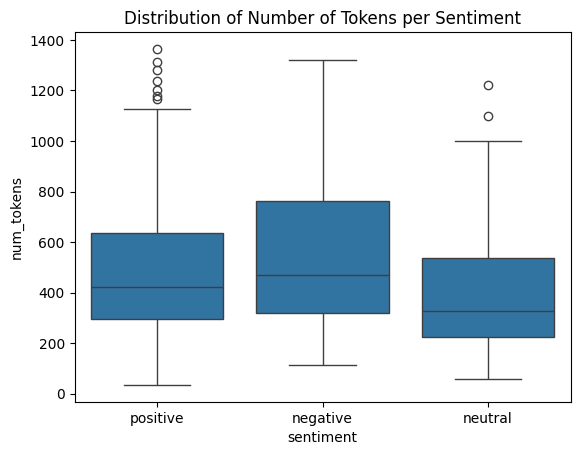

In [39]:
# Plot chart to view the sentiment distribution

sns.boxplot(processed_data, x='sentiment', y='num_tokens')
plt.title('Distribution of Number of Tokens per Sentiment')
plt.show()

In [40]:
from textblob import TextBlob

In [41]:
# Convert the 'token_content' column (list of tokens) to a string representation
processed_data['token_content_str'] = processed_data['token_content'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

processed_data['token_content_str']

0      since nobody reads rules maybe post easier see...
1      get hard feelings chest please remember peer s...
2      hi flatmate refuses dishes using adhd reason a...
3      ill real every single time sit meeting try tak...
4      uni assignments currently loop getting extensi...
                             ...                        
566    severe adhd can not take stimulants due horrif...
567    ive vyvanse almost years started mg upped mg y...
568    quotations boring subjective dont think conten...
569    took break sleep schedule messed didnt make se...
570    hi im mid recently diagnosed not yet medicatio...
Name: token_content_str, Length: 571, dtype: object

In [42]:
import sqlite3

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Load the processed_data DataFrame into a SQL table named 'processed_data_table'
# Exclude the original 'token_content' column
processed_data[['content', 'sentiment', 'cleaned_text', 'lemm_token', 'num_tokens', 'token_content_str']].to_sql('processed_data_table', conn, index=False, if_exists='replace')

# Create a cursor object
cursor = conn.cursor()

# Execute a SQL query to fetch all data from the table
cursor.execute("SELECT * FROM processed_data_table")

# Fetch all rows from the executed query
rows = cursor.fetchall()

# Get the column names from the cursor description
column_names = [description[0] for description in cursor.description]

# Create a new DataFrame from the fetched rows and column names
sql_df = pd.DataFrame(rows, columns=column_names)


# Display the resulting DataFrame
display(sql_df.head())

content sentiment  \
0  Since nobody reads the rules, maybe this post ...  positive   
1  Get those hard feelings off your chest here. P...  negative   
2  Hi. My flatmate refuses to do the dishes using...  negative   
3  So I’ll be real every single time I sit throug...  positive   
4  I have 4 uni assignments and I am currently in...  negative   

                                        cleaned_text  \
0  since nobody reads rules maybe post easier see...   
1  get hard feelings chest please remember  peer ...   
2  hi flatmate refuses dishes using adhd reason a...   
3  ill real every single time sit meeting try tak...   
4  uni assignments currently loop getting extensi...   

                                          lemm_token  num_tokens  \
0  since nobody read rule maybe post easier see a...         650   
1  get hard feeling chest please remember peer su...         416   
2  hi flatmate refuse dish using adhd reason avoi...         289   
3  ill real every single time sit meeting try tak...         785   
4  uni assignment currently loop getting extensio...         256   

                                   token_content_str  
0  since nobody reads rules maybe post easier see...  
1  get hard feelings chest please remember peer s...  
2  hi flatmate refuses dishes using adhd reason a...  
3  ill real every single time sit meeting try tak...  
4  uni assignments currently loop getting extensi...

In [43]:
# Define comprehensive keyword lists for each category
# This is a good starting point, but you can expand it further.
keyword_mapping = {
    'Humor/Meme': ['joke', 'humour', 'humor', 'meme', 'funny', 'lol', 'haha', 'giggle', 'satire', 'relatable'],
    'Medication Discussion': ['meds', 'medication', 'ritalin', 'adderall', 'vyvanse', 'strattera', 'concerta', 'stimulant', 'dose', 'prescribe'],
    'Work/Academic': ['work', 'school', 'academics', 'class', 'job', 'project', 'deadline', 'studying', 'coworker', 'boss', 'career'],
    'Coping Strategy/Tip': ['tips', 'strategy', 'advice', 'help with', 'manage', 'coping', 'hack', 'how to', 'organize', 'planning', 'routine', 'technique'],
    'Emotional/Personal Struggle': ['emotional', 'anxiety', 'depressed', 'frustrated', 'guilt', 'sad', 'hopeless', 'anger', 'lonely', 'exhausted'],
    'Symptom Description': ['symptoms', 'struggle', 'can not focus', 'executive dysfunction', 'overwhelm', 'inattention', 'hyperfocus', 'impulsive', 'restless', 'distracted', 'brain fog']
}

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a new dictionary with lemmatized keywords
lemmatized_keyword_mapping = {}
for category, keywords in keyword_mapping.items():
    lemmatized_keywords = [lemmatizer.lemmatize(word) for word in keywords]
    lemmatized_keyword_mapping[category] = lemmatized_keywords

# Dynamically build the SQL CASE statement from the lemmatized keyword mapping
case_elements = []
for category, keywords in lemmatized_keyword_mapping.items():
    # Building the LIKE conditions for each category's keywords
    like_conditions = [f"LOWER(p.token_content_str) LIKE '%{keyword}%'" for keyword in keywords]
    case_condition = " OR ".join(like_conditions)
    case_elements.append(f"        WHEN {case_condition} THEN '{category}'")

# Construct the full SQL query
query_label = f"""
    SELECT
        p.token_content_str,
        CASE
{chr(10).join(case_elements)}
            ELSE 'Unlabeled'
        END AS adhd_category
    FROM processed_data_table p
"""

In [44]:
# Reading sql query into pandas DataFrame
main_label = pd.read_sql(query_label, conn)

labeled_df = pd.concat([processed_data, main_label], axis=1)

# Drop the second 'content' column (assuming it's the duplicate one from main_label)
labeled_df = labeled_df.loc[:,~labeled_df.columns.duplicated()]

display(labeled_df)

labeled_df.to_csv('labeled_reddit_data.csv', index=False)

# Close the connection
conn.close()

content sentiment  \
0    Since nobody reads the rules, maybe this post ...  positive   
1    Get those hard feelings off your chest here. P...  negative   
2    Hi. My flatmate refuses to do the dishes using...  negative   
3    So I’ll be real every single time I sit throug...  positive   
4    I have 4 uni assignments and I am currently in...  negative   
..                                                 ...       ...   
566  I have severe adhd and I cannot take any stimu...  negative   
567  \nI’ve been on Vyvanse for almost 3 years now....   neutral   
568  Quotations, because "boring" is subjective. I ...  negative   
569  I took a break because my sleep schedule was s...  positive   
570  Hi all so I'm mid 30s and recently diagnosed b...  negative   

                                          cleaned_text  \
0    since nobody reads rules maybe post easier see...   
1    get hard feelings chest please remember  peer ...   
2    hi flatmate refuses dishes using adhd reason a...   
3    ill real every single time sit meeting try tak...   
4    uni assignments currently loop getting extensi...   
..                                                 ...   
566  severe adhd cannot take stimulants due horrifi...   
567  ive vyvanse almost  years started mg upped mg ...   
568  quotations boring subjective dont think conten...   
569  took break sleep schedule messed didnt make se...   
570  hi im mid recently diagnosed not yet medicatio...   

                                         token_content  \
0    [since, nobody, reads, rules, maybe, post, eas...   
1    [get, hard, feelings, chest, please, remember,...   
2    [hi, flatmate, refuses, dishes, using, adhd, r...   
3    [ill, real, every, single, time, sit, meeting,...   
4    [uni, assignments, currently, loop, getting, e...   
..                                                 ...   
566  [severe, adhd, can, not, take, stimulants, due...   
567  [ive, vyvanse, almost, years, started, mg, upp...   
568  [quotations, boring, subjective, dont, think, ...   
569  [took, break, sleep, schedule, messed, didnt, ...   
570  [hi, im, mid, recently, diagnosed, not, yet, m...   

                                            lemm_token  num_tokens  \
0    since nobody read rule maybe post easier see a...         650   
1    get hard feeling chest please remember peer su...         416   
2    hi flatmate refuse dish using adhd reason avoi...         289   
3    ill real every single time sit meeting try tak...         785   
4    uni assignment currently loop getting extensio...         256   
..                                                 ...         ...   
566  severe adhd can not take stimulant due horrifi...         210   
567  ive vyvanse almost year started mg upped mg ye...        1099   
568  quotation boring subjective dont think content...         399   
569  took break sleep schedule messed didnt make se...         542   
570  hi im mid recently diagnosed not yet medicatio...         808   

                                     token_content_str          adhd_category  
0    since nobody reads rules maybe post easier see...  Medication Discussion  
1    get hard feelings chest please remember peer s...              Unlabeled  
2    hi flatmate refuses dishes using adhd reason a...              Unlabeled  
3    ill real every single time sit meeting try tak...             Humor/Meme  
4    uni assignments currently loop getting extensi...          Work/Academic  
..                                                 ...                    ...  
566  severe adhd can not take stimulants due horrif...  Medication Discussion  
567  ive vyvanse almost years started mg upped mg y...  Medication Discussion  
568  quotations boring subjective dont think conten...              Unlabeled  
569  took break sleep schedule messed didnt make se...  Medication Discussion  
570  hi im mid recently diagnosed not yet medicatio...  Medication Discussion  

[571 rows x 8 columns]

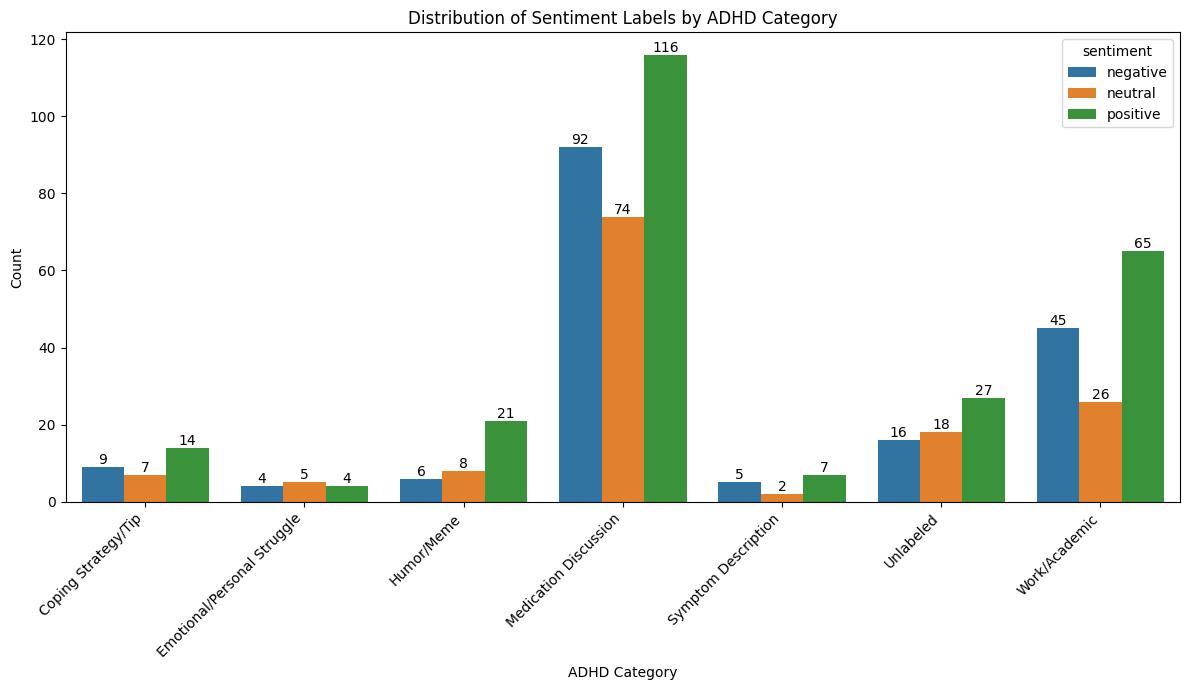

In [45]:
# Group by adhd_category and label and count the occurrences
category_sentiment_counts = labeled_df.groupby(['adhd_category', 'sentiment']).size().reset_index(name='count')

# Create a grouped bar chart
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=category_sentiment_counts, x='adhd_category', y='count', hue='sentiment')
plt.title('Distribution of Sentiment Labels by ADHD Category')
plt.xlabel('ADHD Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Add counts on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

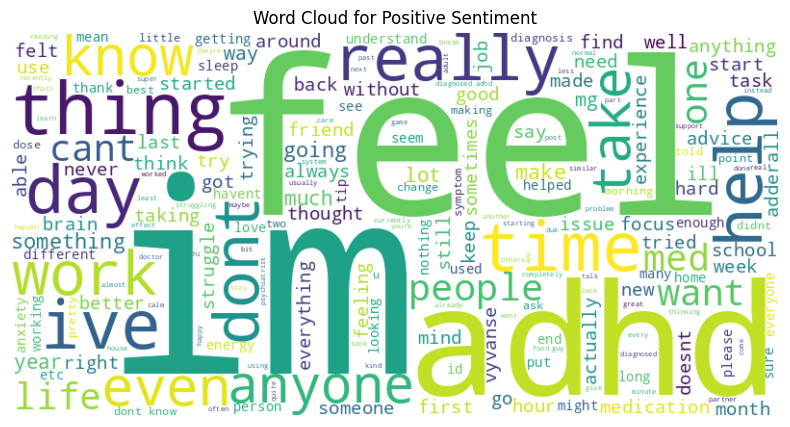

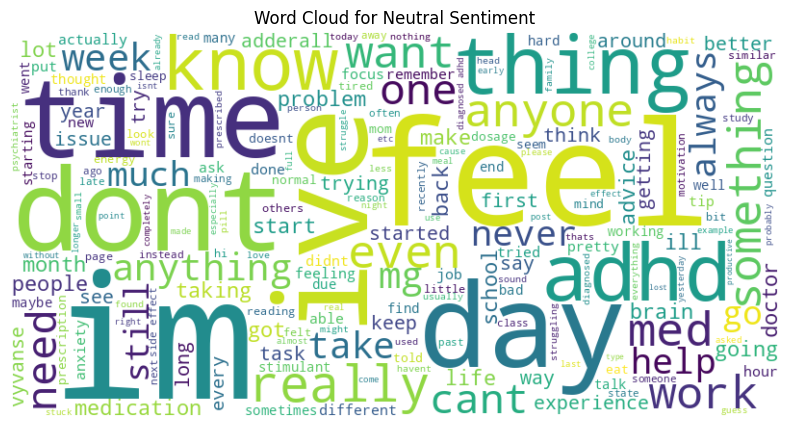

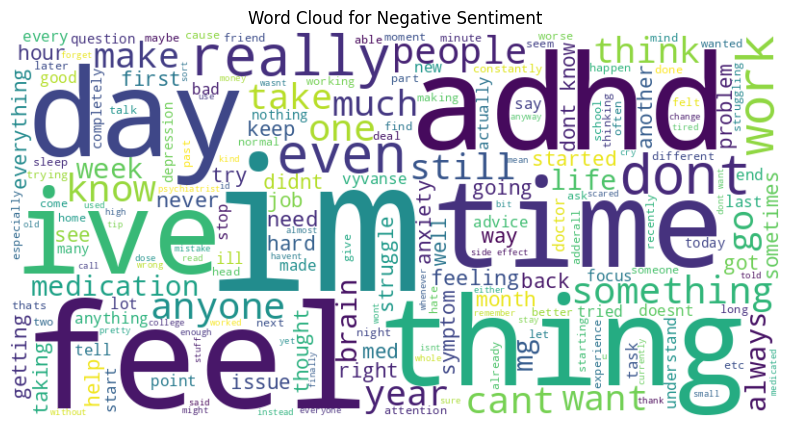

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all lemmatized tokens for each sentiment category
positive_text = " ".join(processed_data[processed_data['sentiment'] == 'positive']['lemm_token'])
neutral_text = " ".join(processed_data[processed_data['sentiment'] == 'neutral']['lemm_token'])
negative_text = " ".join(processed_data[processed_data['sentiment'] == 'negative']['lemm_token'])

# Generate Word Cloud for Positive Sentiment
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Sentiment")
plt.show()

# Generate Word Cloud for Neutral Sentiment
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Neutral Sentiment")
plt.show()

# Generate Word Cloud for Negative Sentiment
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Negative Sentiment")
plt.show()

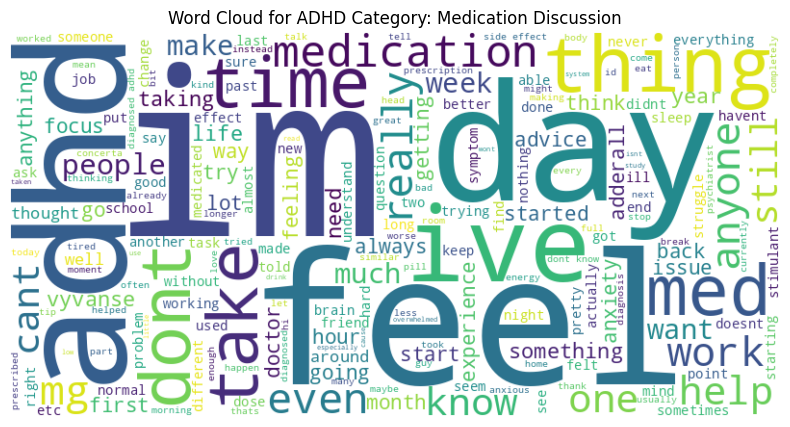

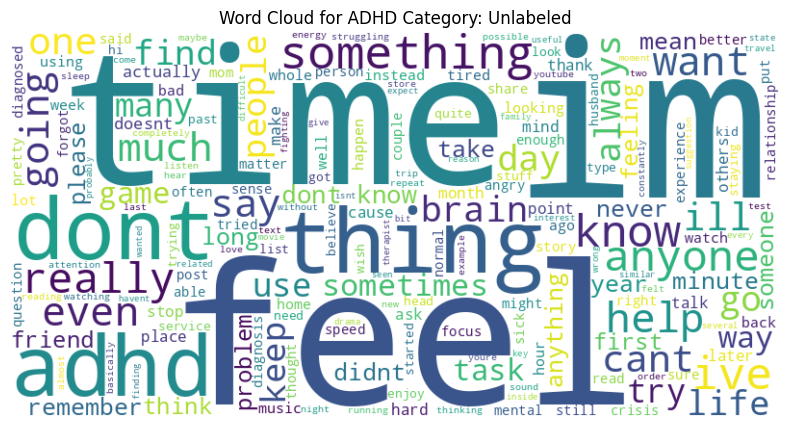

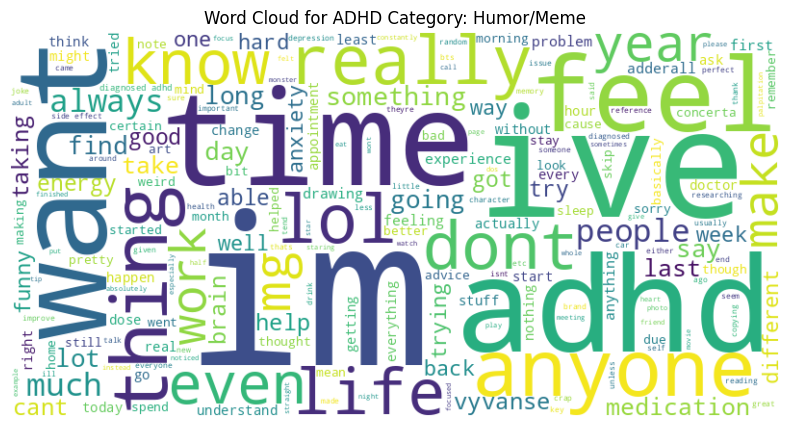

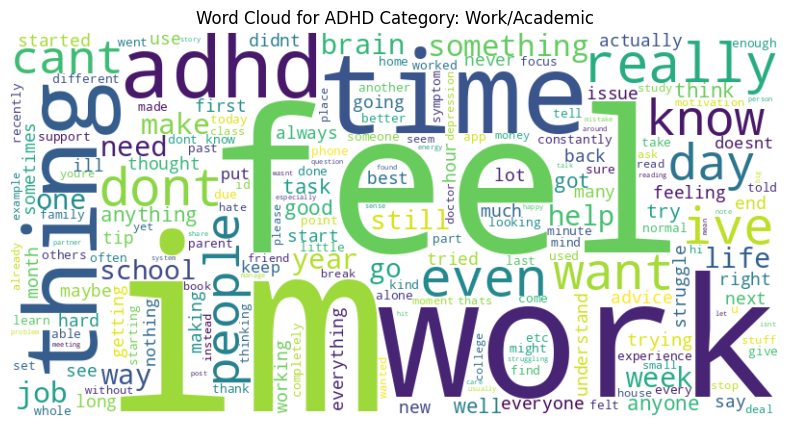

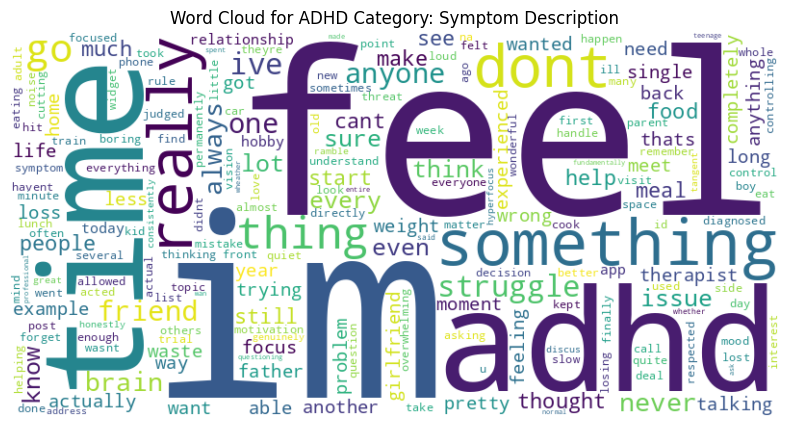

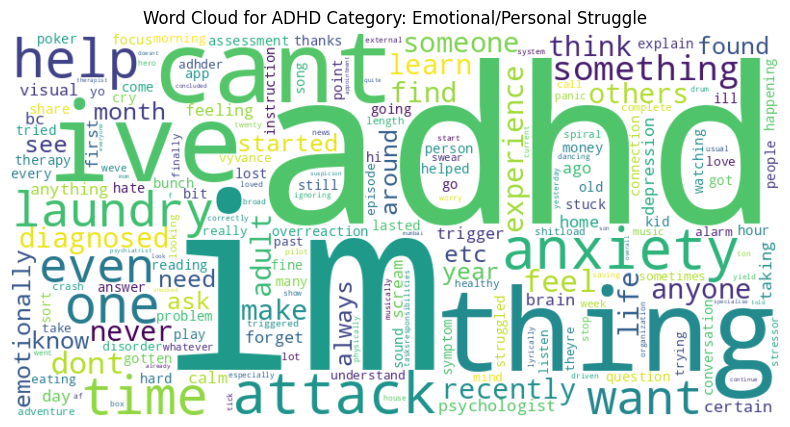

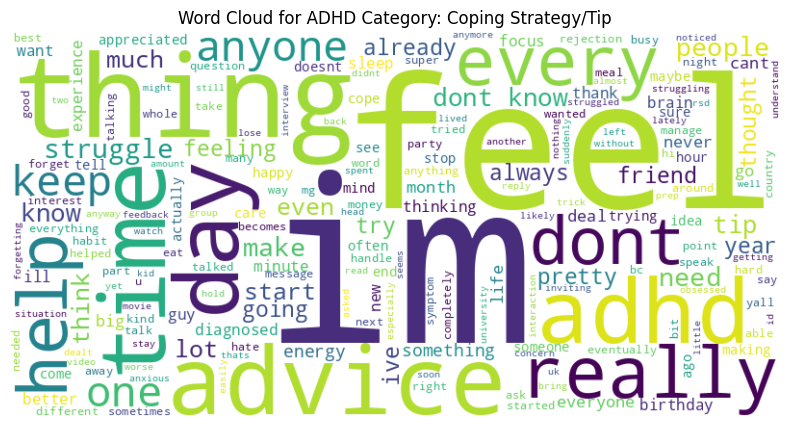

In [47]:
# Combine all lemmatized tokens for each ADHD category
adhd_categories = labeled_df['adhd_category'].unique()

for category in adhd_categories:
    category_text = " ".join(labeled_df[labeled_df['adhd_category'] == category]['lemm_token'])
    wordcloud_category = WordCloud(width=800, height=400, background_color='white').generate(category_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_category, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for ADHD Category: {category}")
    plt.show()

---


# **Create Dictionary and Corpus**
Create a dictionary and corpus from the lemmatized tokens


In [1]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import Phrases, CoherenceModel
from gensim.models.phrases import Phraser
from gensim.models.ldamulticore import LdaMulticore
import matplotlib.pyplot as plt

In [48]:
# ----
# Step 1: Load/inspect your data
# Assumes you already have labeled_df in your session and it contains 'token_content_str'
# e.g., labeled_df = pd.read_csv('your_file.csv')
print("Dataframe shape:", labeled_df.shape)
print("Sample values from token_content_str:")
print(labeled_df['token_content_str'].head(5))

Dataframe shape: (571, 8)
Sample values from token_content_str:
0    since nobody reads rules maybe post easier see...
1    get hard feelings chest please remember peer s...
2    hi flatmate refuses dishes using adhd reason a...
3    ill real every single time sit meeting try tak...
4    uni assignments currently loop getting extensi...
Name: token_content_str, dtype: object


In [49]:
# ----
# Step 2: Normalize token format (ensure each doc is a list of tokens)
def to_token_list(x):
    if pd.isna(x):
        return []
    # if already a list
    if isinstance(x, list):
        return [str(t).lower() for t in x if isinstance(t, (str, int))]
    # if a string, assume tokens separated by whitespace (common for pre-tokenized strings)
    if isinstance(x, str):
        # remove extra spaces and split
        tokens = x.strip().split()
        return [t.lower() for t in tokens if t is not None]
    # fallback: convert to string then split
    return str(x).strip().split()

# create tokenized list
texts = labeled_df['token_content_str'].map(to_token_list).tolist()

# Remove empty docs and keep indices if desired
nonempty_idx = [i for i, doc in enumerate(texts) if len(doc) > 0]
texts = [texts[i] for i in nonempty_idx]
print(f"Number of non-empty documents: {len(texts)}")

Number of non-empty documents: 571


In [50]:
# ----
# Step 3: Light cleaning & stopword removal (customize thresholds)
def clean_tokens(tokens):
    out = []
    for t in tokens:
        # remove URLs, subreddit/user mentions (if present in tokens)
        t = re.sub(r'http\S+|www\S+|https\S+', '', t)
        t = re.sub(r'/?r/[\w_]+', '', t)
        t = re.sub(r'u/[\w_]+', '', t)
        # remove non-alphanumeric characters
        t = re.sub(r'[^a-z0-9]', '', t)
        if len(t) < 3:
            continue
        if t in stop_words:
            continue
        out.append(t)
    return out

texts = [clean_tokens(doc) for doc in texts]
# Remove any docs that may have become empty after cleaning
texts = [doc for doc in texts if len(doc) > 0]
print(f"Docs after cleaning: {len(texts)}")

Docs after cleaning: 571


In [51]:
# ----
# Step 4 (optional but recommended): detect bigrams/trigrams to keep multi-word expressions
# Tune min_count and threshold depending on dataset size
bigram = Phrases(texts, min_count=10, threshold=100)   # increase min_count for large corpora
trigram = Phrases(bigram[texts], threshold=100)
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

texts_bigrams = [bigram_mod[doc] for doc in texts]
texts_bigrams = [trigram_mod[bigram_mod[doc]] for doc in texts]  # apply both

In [52]:
# ----
# Step 5: Create Gensim dictionary and corpus (Bag-of-Words)
dictionary = corpora.Dictionary(texts_bigrams)

# Filter extremes to remove very rare/common tokens
# no_below: keep tokens that appear in at least X docs
# no_above: keep tokens that appear in less than this fraction of docs
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

# Create corpus: list of bag-of-words representations for each document
corpus = [dictionary.doc2bow(doc) for doc in texts_bigrams]
print(f"Number of unique tokens: {len(dictionary)}")
print(f"Number of documents in corpus: {len(corpus)}")

Number of unique tokens: 1297
Number of documents in corpus: 571


In [53]:
# ----
# Step 6: Train LDA model (start with a reasonable default num_topics)
# You can change num_topics after inspecting coherence
num_topics = 10
lda = LdaMulticore(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=100,
    workers=3,       # adjust to your CPU cores
    chunksize=100,
    passes=10,
    iterations=100,
    per_word_topics=True
)


# ----
# Step 7: Print out the topics (top words per topic)
print("\nLDA topics (topic id : top words):\n")
for idx, topic in lda.print_topics(num_topics=num_topics, num_words=12):
    print("Topic {:>2d}: {}".format(idx, topic))

# ----
# Step 8: Compute coherence score (c_v is recommended for interpretability)
coherence_model_lda = CoherenceModel(model=lda, texts=texts_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print("\nCoherence Score (c_v): {:.4f}".format(coherence_lda))

# Optionally compute u_mass (uses corpus)
coherence_umass = CoherenceModel(model=lda, corpus=corpus, dictionary=dictionary, coherence='u_mass').get_coherence()
print("Coherence Score (u_mass): {:.4f}".format(coherence_umass))


LDA topics (topic id : top words):

Topic  0: 0.017*"things" + 0.016*"ive" + 0.016*"get" + 0.015*"adhd" + 0.014*"really" + 0.013*"thing" + 0.011*"something" + 0.011*"help" + 0.009*"life" + 0.007*"work" + 0.007*"even" + 0.007*"someone"
Topic  1: 0.019*"adhd" + 0.017*"ive" + 0.014*"feel" + 0.013*"people" + 0.012*"anxiety" + 0.009*"even" + 0.008*"dont" + 0.008*"time" + 0.007*"life" + 0.007*"cant" + 0.007*"get" + 0.007*"really"
Topic  2: 0.020*"adhd" + 0.012*"something" + 0.011*"get" + 0.009*"ive" + 0.008*"really" + 0.008*"diagnosed" + 0.007*"year" + 0.007*"currently" + 0.007*"way" + 0.007*"anyone" + 0.007*"need" + 0.007*"know"
Topic  3: 0.017*"something" + 0.015*"adhd" + 0.014*"get" + 0.013*"time" + 0.011*"cant" + 0.010*"task" + 0.010*"help" + 0.010*"even" + 0.009*"work" + 0.008*"minute" + 0.008*"brain" + 0.008*"ive"
Topic  4: 0.014*"adhd" + 0.014*"ive" + 0.012*"school" + 0.010*"would" + 0.008*"days" + 0.008*"time" + 0.007*"first" + 0.007*"really" + 0.007*"work" + 0.006*"never" + 0.006*"

In [57]:
from gensim.models import TfidfModel

# Create TF-IDF model from BoW corpus
tfidf_model = TfidfModel(corpus, id2word=dictionary)

# Transform corpus to TF-IDF
corpus_tfidf = tfidf_model[corpus]

# Train LDA on TF-IDF (not standard, but sometimes useful)
lda_tfidf = LdaMulticore(
    corpus=corpus_tfidf,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=100,
    workers=3,
    chunksize=100,
    passes=10,
    iterations=100,
    per_word_topics=True
)

print("\nLDA Topics (TF-IDF weighted corpus):\n")
for idx, topic in lda_tfidf.print_topics(num_topics=num_topics, num_words=12):
    print("Topic {:>2d}: {}".format(idx, topic))



LDA Topics (TF-IDF weighted corpus):

Topic  0: 0.007*"goals" + 0.006*"building" + 0.005*"lazy" + 0.005*"laundry" + 0.005*"hobby" + 0.005*"responsibilities" + 0.005*"spending" + 0.004*"believe" + 0.004*"talked" + 0.004*"willing" + 0.004*"achieve" + 0.004*"dumb"
Topic  1: 0.006*"extremely" + 0.006*"explained" + 0.006*"onto" + 0.005*"pain" + 0.005*"games" + 0.005*"growing" + 0.005*"interaction" + 0.004*"ignored" + 0.004*"game" + 0.004*"story" + 0.004*"wonder" + 0.004*"otherwise"
Topic  2: 0.008*"meeting" + 0.008*"forgot" + 0.006*"reminders" + 0.006*"goal" + 0.005*"notes" + 0.005*"book" + 0.005*"hobbies" + 0.005*"forget" + 0.005*"lists" + 0.005*"afford" + 0.005*"missed" + 0.005*"organize"
Topic  3: 0.007*"exhausting" + 0.006*"points" + 0.006*"address" + 0.006*"youtube" + 0.006*"pain" + 0.005*"sound" + 0.005*"sleeping" + 0.005*"consider" + 0.004*"context" + 0.004*"medicine" + 0.004*"lmao" + 0.004*"tiny"
Topic  4: 0.016*"music" + 0.006*"clarity" + 0.006*"psych" + 0.006*"productivity" + 0.0

Computed coherence for k=2: 0.2511
Computed coherence for k=4: 0.2585
Computed coherence for k=6: 0.2512
Computed coherence for k=8: 0.2541
Computed coherence for k=10: 0.2729
Computed coherence for k=12: 0.2521
Computed coherence for k=14: 0.2550
Computed coherence for k=16: 0.2620
Computed coherence for k=18: 0.2624
Computed coherence for k=20: 0.2598


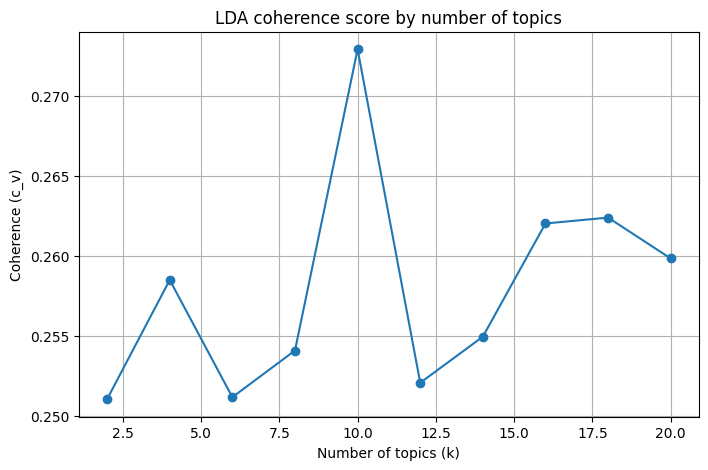

Best k by c_v coherence: 10
Topic  0: 0.017*"ive" + 0.016*"things" + 0.016*"get" + 0.015*"adhd" + 0.014*"thing" + 0.014*"really" + 0.012*"something" + 0.011*"help" + 0.010*"life" + 0.007*"work" + 0.006*"someone" + 0.006*"even"
Topic  1: 0.019*"adhd" + 0.018*"ive" + 0.014*"feel" + 0.013*"people" + 0.013*"anxiety" + 0.009*"even" + 0.008*"dont" + 0.008*"time" + 0.007*"life" + 0.007*"cant" + 0.007*"also" + 0.007*"get"
Topic  2: 0.020*"adhd" + 0.013*"something" + 0.012*"get" + 0.009*"ive" + 0.008*"really" + 0.008*"diagnosed" + 0.007*"year" + 0.007*"way" + 0.007*"currently" + 0.007*"know" + 0.007*"anyone" + 0.007*"insurance"
Topic  3: 0.016*"something" + 0.015*"adhd" + 0.014*"get" + 0.012*"time" + 0.011*"cant" + 0.010*"even" + 0.010*"help" + 0.010*"task" + 0.009*"work" + 0.008*"minute" + 0.008*"would" + 0.008*"ive"
Topic  4: 0.014*"ive" + 0.014*"adhd" + 0.012*"school" + 0.010*"would" + 0.009*"days" + 0.008*"time" + 0.007*"first" + 0.007*"work" + 0.006*"felt" + 0.006*"symptoms" + 0.006*"ago" 

In [54]:
# ----
# Step 9: Sweep multiple topic numbers to choose best K (plot coherence vs num_topics)
def compute_coherence_values(dictionary, corpus, texts, start=2, limit=22, step=2):
    model_list = []
    coherence_values = []
    for k in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=k,
                             random_state=100, workers=3, chunksize=100, passes=10, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(f"Computed coherence for k={k}: {coherence_values[-1]:.4f}")
    return model_list, coherence_values

# Example range: 2..20 topics
model_list, coherence_values = compute_coherence_values(dictionary, corpus, texts_bigrams, start=2, limit=22, step=2)

# Plot
x = list(range(2,22,2))
plt.figure(figsize=(8,5))
plt.plot(x, coherence_values, marker='o')
plt.xlabel("Number of topics (k)")
plt.ylabel("Coherence (c_v)")
plt.title("LDA coherence score by number of topics")
plt.grid(True)
plt.show()

# ----
# Step 10: Pick best model (max coherence) and show its topics
best_idx = int(coherence_values.index(max(coherence_values)))
best_model = model_list[best_idx]
best_k = x[best_idx]
print(f"Best k by c_v coherence: {best_k}")

for idx, topic in best_model.print_topics(num_words=12):
    print("Topic {:>2d}: {}".format(idx, topic))

# Optional: save dictionary, corpus, and model
dictionary.save("lda_dictionary.dict")
corpora.MmCorpus.serialize("lda_corpus.mm", corpus)
best_model.save(f"lda_model_k{best_k}.model")
print("Saved dictionary, corpus and best LDA model to disk.")

In [56]:
# Step A: Helper to print representative documents for each topic
def print_representative_docs(lda_model, corpus, texts, num_docs=3):
    """
    Print top representative documents for each topic.
    """
    for topic_id in range(lda_model.num_topics):
        # Collect docs with their topic contribution weight
        topic_docs = []
        for i, bow in enumerate(corpus):
            topic_dist = lda_model.get_document_topics(bow, minimum_probability=0)
            for t_id, prob in topic_dist:
                if t_id == topic_id:
                    topic_docs.append((i, prob))
                    break

        # Sort docs by contribution weight descending
        topic_docs = sorted(topic_docs, key=lambda x: x[1], reverse=True)[:num_docs]

        print(f"\n=== Topic {topic_id} Representative Documents ===")
        for doc_id, prob in topic_docs:
            print(f"({prob:.3f}) {texts[doc_id][:200]}...")  # truncate to 200 chars

print_representative_docs(best_model, corpus, texts, num_docs=3)



=== Topic 0 Representative Documents ===
(0.989) ['second', 'time', 'started', 'taking', 'strattera', 'adhd', 'medication', 'tried', 'ritalin', 'wellbutrin', 'didnt', 'really', 'help', 'inattentive', 'type', 'possible', 'asperger', 'didnt', 'get', 'diagnosed', 'expensive', 'dont', 'see', 'benefits', 'tbh', 'super', 'easy', 'procrastinate', 'monthsyears', 'maintaining', 'habits', 'extremely', 'difficult', 'not', 'type', 'person', 'brimming', 'ideas', 'interests', 'either', 'although', 'creative', 'always', 'pretty', 'challenging', 'express', 'anyway', 'ive', 'taking', 'strattera', 'months', 'ive', 'slowly', 'risen', 'kinda', 'effective', 'first', 'feel', 'plunging', 'back', 'old', 'unproductive', 'habits', 'thinking', 'increasing', 'dose', 'worry', 'would', 'give', 'temporary', 'relief', 'honestly', 'tired', 'constantly', 'raising', 'hope', 'getting', 'discouraged', 'medication', 'stops', 'working', 'question', 'getting', 'dose', 'right', 'something', 'keep', 'happening', 'brain', 'get

In [58]:
# Step C: Assign dominant topic to each document
def assign_topics(lda_model, corpus, texts, original_df=None, outfile="lda_labeled_posts.csv"):
    doc_topics = []
    for i, bow in enumerate(corpus):
        topic_dist = lda_model.get_document_topics(bow, minimum_probability=0)
        topic_id, prob = max(topic_dist, key=lambda x: x[1])  # dominant topic
        doc_topics.append((i, topic_id, prob, texts[i]))

    # Convert to DataFrame
    topics_df = pd.DataFrame(doc_topics, columns=["doc_id", "topic_id", "topic_prob", "text"])

    # If original dataframe is passed, merge to keep metadata (like subreddit/category)
    if original_df is not None:
        merged_df = original_df.reset_index(drop=True).iloc[:len(topics_df)].copy()
        merged_df["topic_id"] = topics_df["topic_id"]
        merged_df["topic_prob"] = topics_df["topic_prob"]
        merged_df["topic_text"] = topics_df["text"]
        merged_df.to_csv(outfile, index=False)
        print(f"Saved labeled posts with topics to {outfile}")
        return merged_df
    else:
        topics_df.to_csv(outfile, index=False)
        print(f"Saved labeled posts with topics to {outfile}")
        return topics_df


In [59]:
labeled_posts = assign_topics(best_model, corpus, texts, original_df=labeled_df, outfile="adhd_posts_with_topics.csv")
labeled_posts.head()

Saved labeled posts with topics to adhd_posts_with_topics.csv


content sentiment  \
0  Since nobody reads the rules, maybe this post ...  positive   
1  Get those hard feelings off your chest here. P...  negative   
2  Hi. My flatmate refuses to do the dishes using...  negative   
3  So I’ll be real every single time I sit throug...  positive   
4  I have 4 uni assignments and I am currently in...  negative   

                                        cleaned_text  \
0  since nobody reads rules maybe post easier see...   
1  get hard feelings chest please remember  peer ...   
2  hi flatmate refuses dishes using adhd reason a...   
3  ill real every single time sit meeting try tak...   
4  uni assignments currently loop getting extensi...   

                                       token_content  \
0  [since, nobody, reads, rules, maybe, post, eas...   
1  [get, hard, feelings, chest, please, remember,...   
2  [hi, flatmate, refuses, dishes, using, adhd, r...   
3  [ill, real, every, single, time, sit, meeting,...   
4  [uni, assignments, currently, loop, getting, e...   

                                          lemm_token  num_tokens  \
0  since nobody read rule maybe post easier see a...         650   
1  get hard feeling chest please remember peer su...         416   
2  hi flatmate refuse dish using adhd reason avoi...         289   
3  ill real every single time sit meeting try tak...         785   
4  uni assignment currently loop getting extensio...         256   

                                   token_content_str          adhd_category  \
0  since nobody reads rules maybe post easier see...  Medication Discussion   
1  get hard feelings chest please remember peer s...              Unlabeled   
2  hi flatmate refuses dishes using adhd reason a...              Unlabeled   
3  ill real every single time sit meeting try tak...             Humor/Meme   
4  uni assignments currently loop getting extensi...          Work/Academic   

   topic_id  topic_prob                                         topic_text  
0         5    0.747675  [since, nobody, reads, rules, maybe, post, eas...  
1         5    0.802107  [get, hard, feelings, chest, please, remember,...  
2         1    0.661267  [flatmate, refuses, dishes, using, adhd, reaso...  
3         1    0.697191  [ill, real, every, single, time, sit, meeting,...  
4         2    0.819973  [uni, assignments, currently, loop, getting, e...

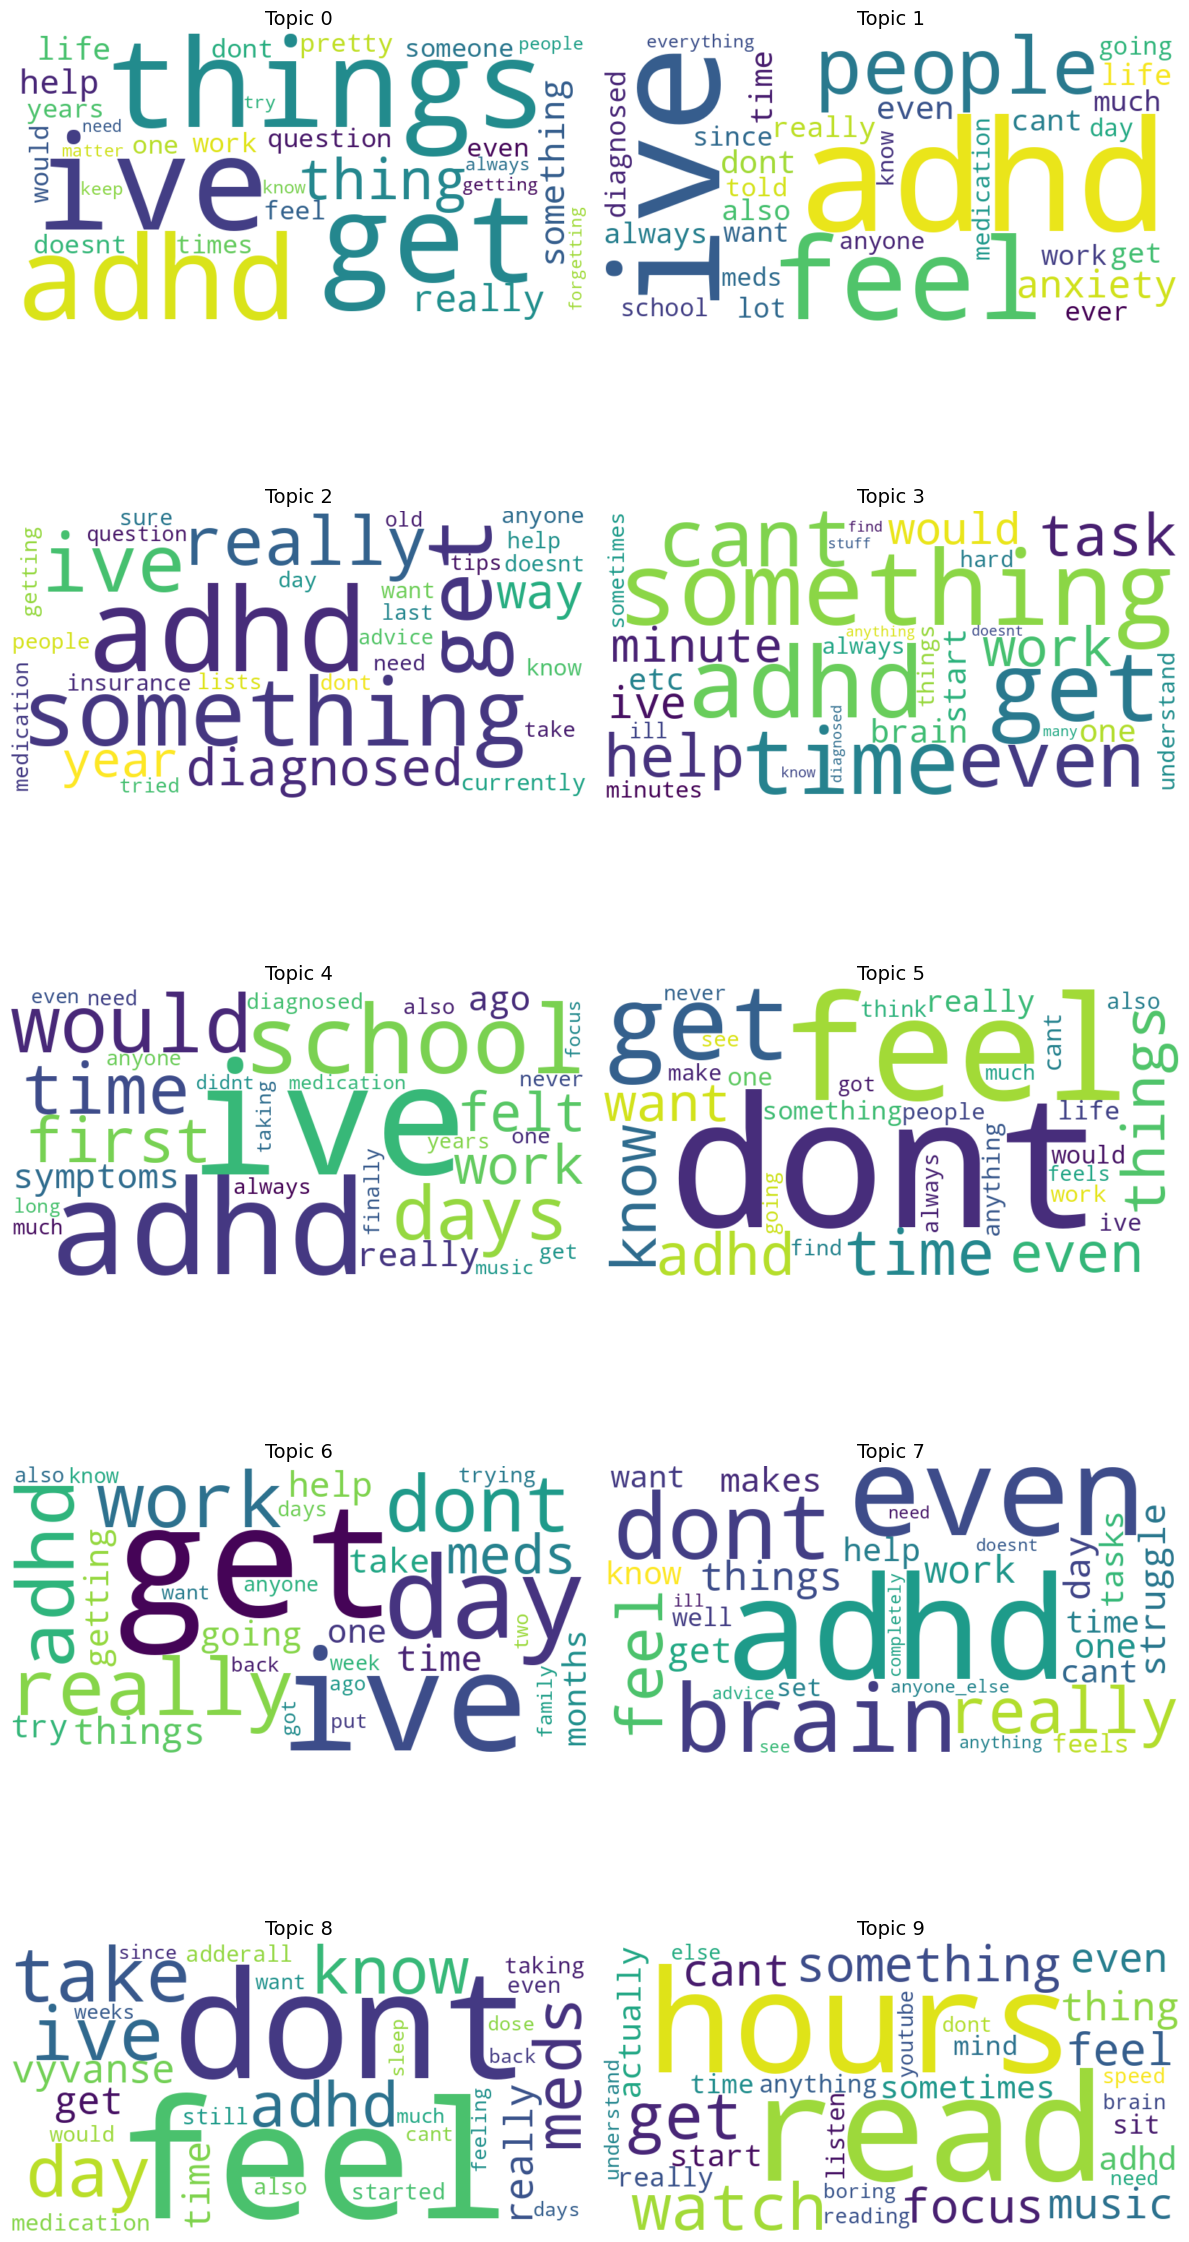

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_lda_wordclouds(lda_model, num_topics=10, num_words=30):
    """
    Generate word clouds for each topic in an LDA model.
    """
    cols = 2
    rows = (num_topics + 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(12, rows*5), dpi=100)

    for i, ax in enumerate(axes.flatten()):
        if i >= num_topics:
            break
        topic_terms = dict(lda_model.show_topic(i, topn=num_words))
        wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_terms)
        ax.imshow(wc, interpolation="bilinear")
        ax.axis("off")
        ax.set_title(f"Topic {i}", fontsize=14)

    plt.tight_layout()
    plt.show()

# Example usage
plot_lda_wordclouds(best_model, num_topics=best_model.num_topics, num_words=30)


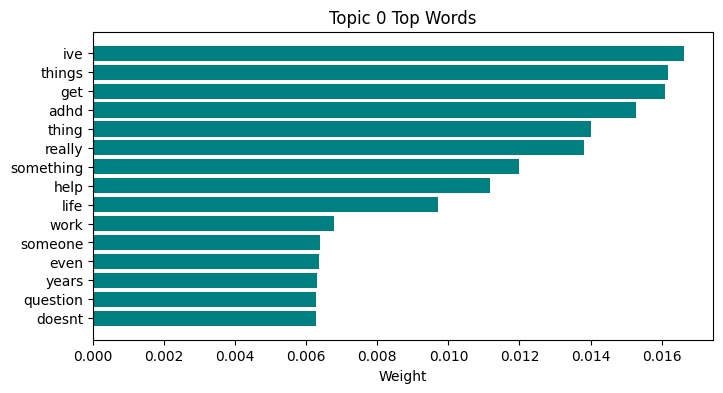

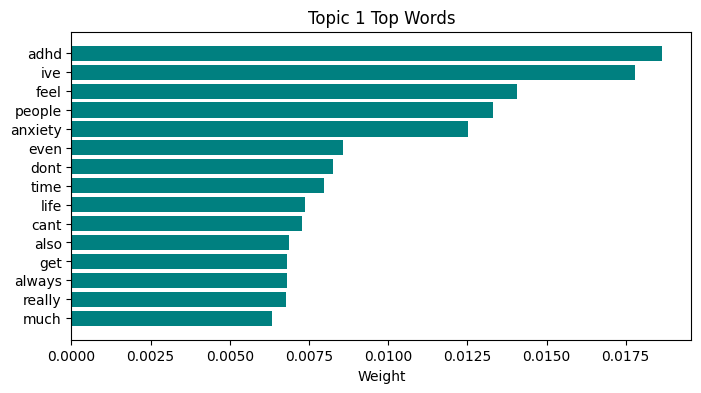

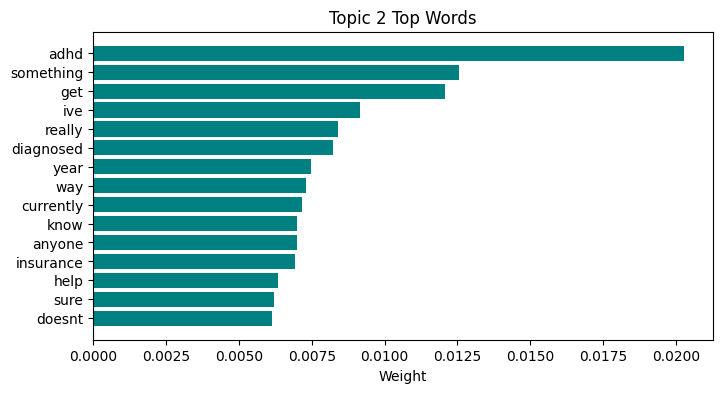

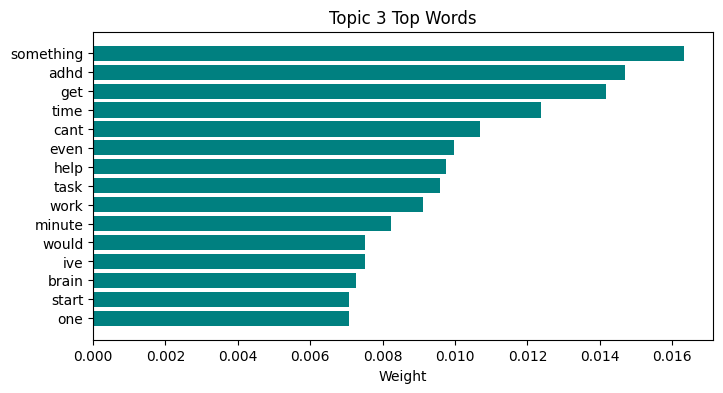

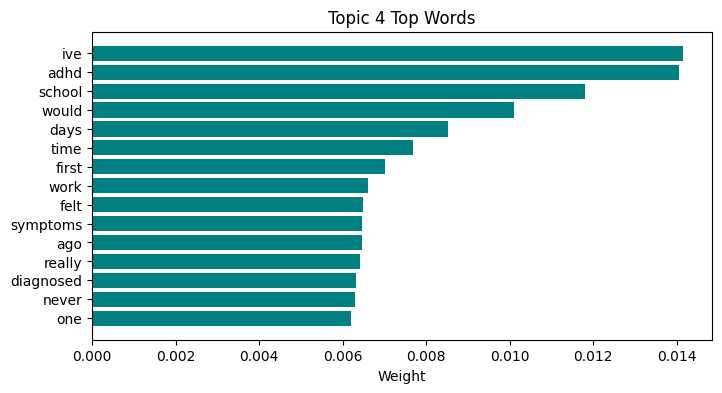

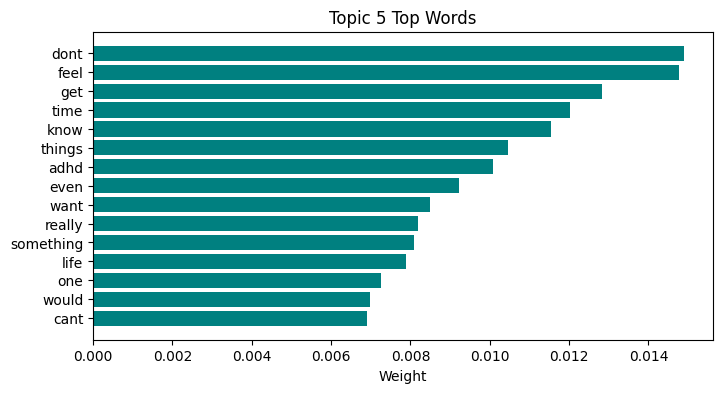

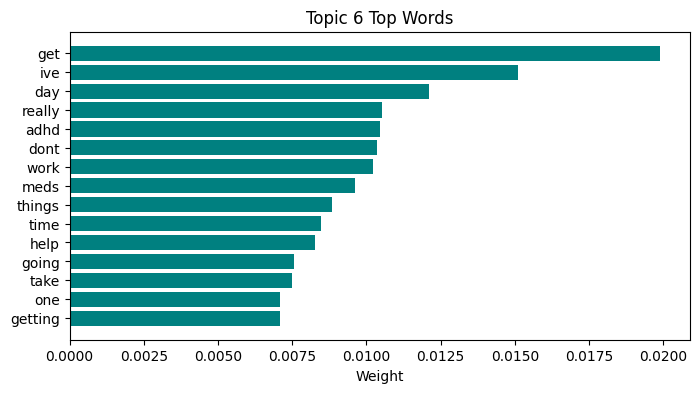

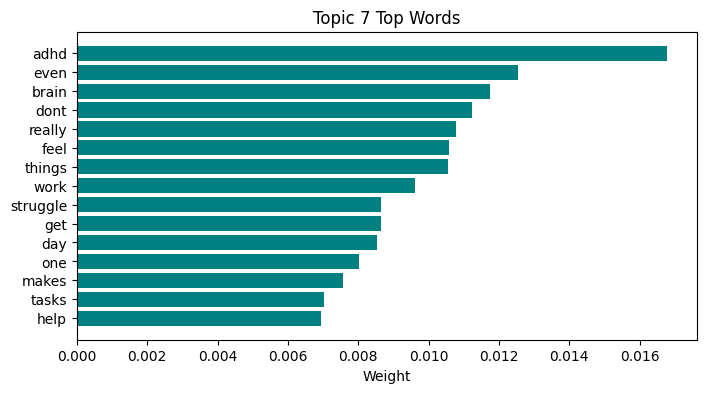

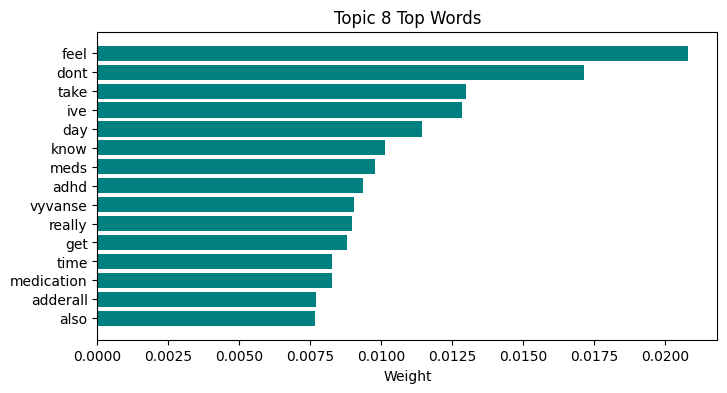

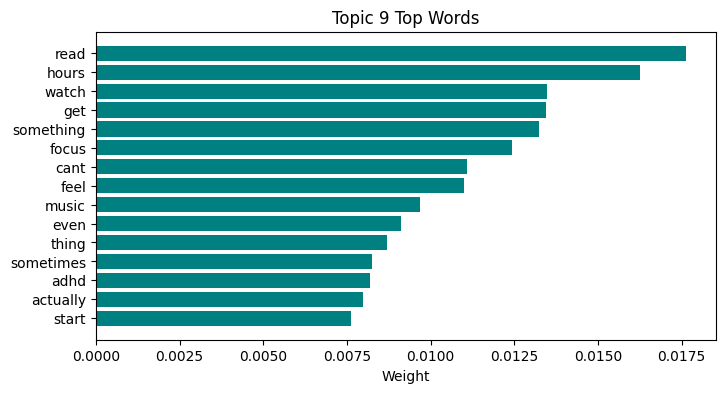

In [65]:
def plot_topic_words(lda_model, topic_id, num_words=15):
    """
    Plot top words for a specific topic as a bar chart.
    """
    terms = lda_model.show_topic(topic_id, topn=num_words)
    words, weights = zip(*terms)

    plt.figure(figsize=(8,4))
    plt.barh(words, weights, color="teal")
    plt.gca().invert_yaxis()
    plt.title(f"Topic {topic_id} Top Words")
    plt.xlabel("Weight")
    plt.show()

# Example: plot words for Topic 0
for i in range(best_model.num_topics):
    # print(f"\n=== Topic {i} Top Words ===")
    plot_topic_words(best_model, topic_id=i, num_words=15)


In [61]:
# # Ensure we have topic assignments
# labeled_posts = assign_topics(best_model, corpus, texts, original_df=labeled_df, outfile="adhd_posts_with_topics.csv")

# # Cross-tabulation: ADHD categories vs LDA topic IDs
# topic_cross = pd.crosstab(labeled_posts["adhd_category"], labeled_posts["topic_id"])
# print("\nTopic alignment with ADHD categories (raw counts):")
# print(topic_cross.head())

# # Normalize to percentages per ADHD category
# topic_cross_percent = topic_cross.div(topic_cross.sum(axis=1), axis=0).round(3)
# print("\nTopic alignment with ADHD categories (percentages):")
# print(topic_cross_percent.head())

# # Save results
# topic_cross.to_csv("adhd_category_vs_topics_counts.csv")
# topic_cross_percent.to_csv("adhd_category_vs_topics_percentages.csv")
# print("Saved ADHD category vs topic alignments to CSV")

# # Optional: visualize heatmap
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12,6))
# sns.heatmap(topic_cross_percent, annot=True, cmap="viridis", fmt=".2f")
# plt.title("Alignment of ADHD Categories with LDA Topics (Percentages)")
# plt.ylabel("ADHD Category")
# plt.xlabel("LDA Topic ID")
# plt.tight_layout()
# plt.show()


---


# **Naive Bayes Model**
Using TF-IDF (Term Frequency–Inverse Document Frequency) to represent words

> (a.) Convert text into TF-IDF vectors <br>
> (b.) Train a Multinomial Naive Bayes Classifier <br>
> (c.) Predict sentiment(ADHD Category and Sentiment) <br>


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline # Import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

encoder = LabelEncoder()
labeled_df['adhd_category_label'] = encoder.fit_transform(labeled_df['adhd_category'])
labeled_df['sentiment_label'] = encoder.fit_transform(labeled_df['sentiment'])


# ==========================
# Model training, testing and splitting - ADHD category
# ==========================
x_adhd_train, x_adhd_test, y_adhd_train, y_adhd_test = train_test_split(
    labeled_df['token_content_str'], labeled_df['adhd_category_label'],
    test_size=0.2, random_state=42, stratify=labeled_df['adhd_category_label']
)

print("ADHD category training samples:", len(x_adhd_train))
print("ADHD category testing samples:", len(x_adhd_test))

# ==========================
# Model training, testing and splitting - Sentiment category
# ==========================
x_sentiment_train, x_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(
    labeled_df['token_content_str'], labeled_df['sentiment_label'],
    test_size=0.2, random_state=42, stratify=labeled_df['sentiment_label']
)

print("Sentiment category training samples:", len(x_sentiment_train))
print("Sentiment category testing samples:", len(x_sentiment_test))


### **Applying SMOTE and Vectorization - TFID**

In [ ]:
# ==========================
# Function to plot distributions
# ==========================
def plot_distribution(y_before, y_after, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Before SMOTE
    sns.countplot(x=y_before, ax=axes[0], palette="viridis")
    axes[0].set_title(f"{title} - Before SMOTE")
    axes[0].set_xlabel("Class Label")
    axes[0].set_ylabel("Count")

    # After SMOTE
    sns.countplot(x=y_after, ax=axes[1], palette="viridis")
    axes[1].set_title(f"{title} - After SMOTE")
    axes[1].set_xlabel("Class Label")
    axes[1].set_ylabel("Count")

    plt.tight_layout()
    plt.show()

smote = SMOTE(random_state=42)
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(2,3))

# ==========================
# ADHD Category Distribution
# ==========================
x_adhd_train_tfidf = tfidf.fit_transform(x_adhd_train)
x_adhd_bal, y_adhd_bal = smote.fit_resample(x_adhd_train_tfidf, y_adhd_train)
print("ADHD distribution before SMOTE:", Counter(y_adhd_train))
print("ADHD distribution after SMOTE:", Counter(y_adhd_bal))
plot_distribution(y_adhd_train, y_adhd_bal, "ADHD Category")


# ==========================
# Sentiment Category Distribution
# ==========================
x_sentiment_train_tfidf = tfidf.fit_transform(x_sentiment_train)
x_sentiment_bal, y_sentiment_bal = smote.fit_resample(x_sentiment_train_tfidf, y_sentiment_train)
print("Sentiment distribution before SMOTE:", Counter(y_sentiment_train))
print("Sentiment distribution after SMOTE:", Counter(y_sentiment_bal))
plot_distribution(y_sentiment_train, y_sentiment_bal, "Sentiment Category")

### **Applying SMOTE and Vectorization - BERT**

In [ ]:
from transformers import *

# ==========================
# Initialise BertTokenizer
# ==========================
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_length = 200 # Max length for tokens


tokenized_content = [tokenizer.tokenize(content) for content in labeled_df['token_content_str']]
max_content = [content[:max_length] for content in tokenized_content]

# ==========================
# Apply CLS and SEP special tokens at the beginning of each sentence and as a sentence separator
# ==========================
for i in range(len(max_content)):
    content = max_content[i]
    content = ['[CLS]'] + content + ['[SEP]']
    max_content[i] = content

print(max_content[50])

# ==========================
# Convert tokens into IDs and
# pad tokens which are less than max_length size
# ==========================

input_ids = [tokenizer.convert_tokens_to_ids(content) for content in max_content]
input_ids = tf.keras.preprocessing.sequence.pad_sequences(input_ids, maxlen=max_length+2, truncating='post', padding='post')
print(f"\n The shape of the tokenised data is: {input_ids.shape}")

In [ ]:
# ==========================
# Model training, testing and splitting - ADHD category
# ==========================
x_adhd_train, x_adhd_test, y_adhd_train, y_adhd_test = train_test_split(
    input_ids, labeled_df['adhd_category_label'],
    test_size=0.2, random_state=42, stratify=labeled_df['adhd_category_label']
)
print("ADHD category training samples:", len(x_adhd_train))
print("ADHD category testing samples:", len(x_adhd_test))

# ==========================
# Model training, testing and splitting - Sentiment category
# ==========================
x_sentiment_train, x_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(
    input_ids, labeled_df['sentiment_label'],
    test_size=0.2, random_state=42, stratify=labeled_df['sentiment_label']
)
print("Sentiment category training samples:", len(x_sentiment_train))
print("Sentiment category testing samples:", len(x_sentiment_test))


# ==========================
# Function to plot distributions
# ==========================
def plot_distribution(y_before, y_after, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Before SMOTE
    sns.countplot(x=y_before, ax=axes[0], palette="viridis")
    axes[0].set_title(f"{title} - Before SMOTE")
    axes[0].set_xlabel("Class Label")
    axes[0].set_ylabel("Count")

    # After SMOTE
    sns.countplot(x=y_after, ax=axes[1], palette="viridis")
    axes[1].set_title(f"{title} - After SMOTE")
    axes[1].set_xlabel("Class Label")
    axes[1].set_ylabel("Count")

    plt.tight_layout()
    plt.show()

smote = SMOTE(random_state=42)

# ==========================
# ADHD Category Distribution
# ==========================
x_adhd_sm, y_adhd_sm = smote.fit_resample(x_adhd_train, y_adhd_train)
print("ADHD distribution before SMOTE:", Counter(y_adhd_train))
print("ADHD distribution after SMOTE:", Counter(y_adhd_bal))
plot_distribution(y_adhd_train, y_adhd_sm, "ADHD Category")


# ==========================
# Sentiment Category Distribution
# ==========================
x_sentiment_sm, y_sentiment_sm = smote.fit_resample(x_sentiment_train, y_sentiment_train)
print("Sentiment distribution before SMOTE:", Counter(y_sentiment_train))
print("Sentiment distribution after SMOTE:", Counter(y_sentiment_bal))
plot_distribution(y_sentiment_train, y_sentiment_sm, "Sentiment Category")

In [ ]:
# Create attention masks for training
train_attn_masks = []
# Create a mask of 1s for each token followed by 0s for padding
for seq in x_adhd_sm:
  seq_mask = [float(i>0) for i in seq]
  train_attn_masks.append(seq_mask)


# Create attention masks for Test
test_attn_masks = []
# Create a mask of 1s for each token followed by 0s for padding
for seq in x_sentiment_sm:
  seq_mask = [float(i>0) for i in seq]
  test_attn_masks.append(seq_mask)


print(train_attn_masks[100])

In [ ]:
# ==========================
# Load Pre-trained Bert Model with Classification layer
# ==========================
model_adhd = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=7)
model_sentiment = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

In [ ]:
# ==========================
# Check model summary and the layers and the number of parameters
# ==========================

model_adhd.summary()
model_sentiment.summary()

In [ ]:
from transformers import create_optimizer

# total training steps (example: num_train_steps = steps_per_epoch * num_epochs)
num_train_steps = 1000
num_warmup_steps = int(0.1 * num_train_steps)

optimizer_adhd, schedule_adhd = create_optimizer(
    init_lr=3e-4,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps
)

optimizer_sentiment, schedule_sentiment = create_optimizer(
    init_lr=3e-4,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps
)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_adhd.compile(optimizer=optimizer_adhd, loss=loss, metrics=['accuracy'])
model_sentiment.compile(optimizer=optimizer_sentiment, loss=loss, metrics=['accuracy'])


In [ ]:
# ==========================
# ADHD
# ==========================

train_x_data_adhd = {'input_ids': np.array(x_adhd_sm), 'attention_mask': np.array(train_attn_masks)}
test_x_data_adhd = {'input_ids': np.array(x_adhd_test), 'attention_mask': np.array(test_attn_masks)}


# ==========================
# Sentiment
# ==========================

train_x_data_sentiment = {'input_ids': np.array(x_sentiment_sm), 'attention_mask': np.array(train_attn_masks)}
test_x_data_sentiment = {'input_ids': np.array(x_sentiment_test), 'attention_mask': np.array(test_attn_masks)}

print(train_x_data_adhd)
print(train_x_data_sentiment)

In [ ]:
print(type(y_adhd_sm), getattr(y_adhd_sm, 'dtype', None))
print(type(y_adhd_test), getattr(y_adhd_test, 'dtype', None))
print("\n")
print(type(y_sentiment_sm), getattr(y_sentiment_train, 'dtype', None))
print(type(y_sentiment_test), getattr(y_sentiment_test, 'dtype', None))

In [ ]:
# ==========================
# ADHD
# ==========================
history_adhd = model_adhd.fit(train_x_data_adhd, y_adhd_sm,
          validation_data=(test_x_data_adhd, y_adhd_test),
          batch_size=16,
          epochs=1)

In [ ]:

# ==========================
# Train Naive Bayes with SMOTE inside pipeline
# ==========================
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    # ('tfidf', TfidfVectorizer(max_features=5000)),
    # ('smote', SMOTE(random_state=42)),   # SMOTE inside pipeline
    ('nb', MultinomialNB())
])

param_grid = {
    # 'tfidf__ngram_range': [(1,2), (2,3)],
    'nb__alpha': [0.01, 0.1, 0.5, 1.0, 2.0]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# ADHD training
grid_search.fit(x_adhd_train, y_adhd_train)
print("Best Parameters for ADHD category:", grid_search.best_params_)
print("Best Cross-Validation Score for ADHD category:", grid_search.best_score_)

# Sentiment training
grid_search.fit(x_sentiment_train, y_sentiment_train)
print("Best Parameters for Sentiment category:", grid_search.best_params_)
print("Best Cross-Validation Score for Sentiment category:", grid_search.best_score_)


In [ ]:
## Model Evaluation
# ==============================


---

## **Model Architecture Development**

### **Model training - BERT**

In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text

preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [ ]:
# Load the BERT preprocess model and encoder model from TensorFlow Hub
bert_preprocess_model = hub.KerasLayer(preprocess_url)
bert_encoder_model = hub.KerasLayer(encoder_url)

In [ ]:
# Preprocess the text data using the BERT preprocess model
text_input = [tf.constant(text) for text in labeled_df['token_content_str'].tolist()]
text_preprocessed = bert_preprocess_model(text_input)

# Display the preprocessed data (this will show the tokenized and padded output)
display(text_preprocessed)

In [ ]:
# Use the BERT encoder model to get the pooled output (sentence embeddings)
text_encoded = bert_encoder_model(text_preprocessed)

# The 'pooled_output' is typically used for sentence-level tasks
# The 'sequence_output' contains token-level embeddings
pooled_output = text_encoded['pooled_output']
# sequence_output = text_encoded['sequence_output'] # Uncomment if you need token-level embeddings

# Display the shape of the pooled output
print("Shape of pooled output (sentence embeddings):", pooled_output.shape)

# Display the first few pooled outputs
display(pooled_output[:5])

---

### **Model Training, Testing and Splitting**
Using SVC

In [ ]:
from imblearn.over_sampling import SMOTE

# Assuming 'pooled_output' contains your BERT embeddings
X = pooled_output.numpy() # Convert TensorFlow tensor to NumPy array
y_adhd = labeled_df['adhd_category']
y_sentiment = labeled_df['sentiment']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data (ADHD)
x_sm_adhd, y_sm_adhd = smote.fit_resample(X, y_adhd)

# Apply SMOTE to the training data (Sentiment)
x_sm_sentiment, y_sm_sentiment = smote.fit_resample(X, y_sentiment)

# Display the new distribution of the classes
print("Shape of x_sm_adhd:", x_sm_adhd.shape)
print("Shape of y_train_smote:", y_sm_adhd.shape)
print("\nDistribution of classes after SMOTE:")
display(y_sm_adhd.value_counts())

# Display the new distribution of the classes
print("\nShape of x_sm_adhd:", x_sm_sentiment.shape)
print("Shape of y_train_smote:", y_sm_sentiment.shape)
print("\nDistribution of classes after SMOTE:")
display(y_sm_sentiment.value_counts())

In [ ]:
from sklearn.model_selection import train_test_split

# Split data for adhd_category
X_train_adhd, X_test_adhd, y_train_adhd, y_test_adhd = train_test_split(x_sm_adhd, y_sm_adhd, test_size=0.2, random_state=42, stratify=y_sm_adhd)

# Split data for sentiment
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(x_sm_sentiment, y_sm_sentiment, test_size=0.2, random_state=42, stratify=y_sm_sentiment)

print("Data split for adhd_category:")
print(f"Training data shape: {X_train_adhd.shape}")
print(f"Testing data shape: {X_test_adhd.shape}")
display(y_train_adhd.value_counts())
display(y_test_adhd.value_counts())

print("\nData split for sentiment:")
print(f"Training data shape: {X_train_sentiment.shape}")
print(f"Testing data shape: {X_test_sentiment.shape}")
display(y_train_sentiment.value_counts())
display(y_test_sentiment.value_counts())

In [ ]:
from sklearn.svm import SVC

# Initialize a Support Vector Classifier (SVC) for adhd_category classification
svm_model_adhd = SVC(kernel='linear', probability=True, random_state=42) # Using a linear kernel

# Train the SVM model on the sentiment training data
svm_model_adhd.fit(X_train_adhd, y_train_adhd)

print("SVM model trained successfully for adhd_category classification.")

'''
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'''

# Initialize a Support Vector Classifier (SVC) for sentiment classification
svm_model_sentiment = SVC(kernel='linear', probability=True, random_state=42) # Using a linear kernel

# Train the SVM model on the sentiment training data
svm_model_sentiment.fit(X_train_sentiment, y_train_sentiment)

print("SVM model trained successfully for sentiment classification.")

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the adhd_category test set
y_pred_adhd = svm_model_sentiment.predict(X_test_adhd)

# Evaluate the model
print("adhd_category Classification Report:")
print(classification_report(y_test_adhd, y_pred_adhd))

print("adhd_category Accuracy Score:")
print(accuracy_score(y_test_adhd, y_pred_adhd))

'''
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'''

# Make predictions on the sentiment test set
y_pred_sentiment = svm_model_sentiment.predict(X_test_sentiment)

# Evaluate the model
print("\nSentiment Classification Report:")
print(classification_report(y_test_sentiment, y_pred_sentiment))

print("\nSentiment Accuracy Score:")
print(accuracy_score(y_test_sentiment, y_pred_sentiment))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# --- Logistic Regression ---
print("Training and evaluating Logistic Regression model...")
log_reg_model = LogisticRegression(max_iter=1000, random_state=42) # Increased max_iter for convergence
log_reg_model.fit(X_train_adhd, y_train_adhd)
y_pred_log_reg = log_reg_model.predict(X_test_adhd)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test_adhd, y_pred_log_reg))
print("\nLogistic Regression Accuracy Score:")
print(accuracy_score(y_test_adhd, y_pred_log_reg))

# --- RandomForest Classifier ---
print("\nTraining and evaluating RandomForest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_adhd, y_train_adhd)
y_pred_rf = rf_model.predict(X_test_adhd)

print("\nRandomForest Classifier Classification Report:")
print(classification_report(y_test_adhd, y_pred_rf))
print("\nRandomForest Classifier Accuracy Score:")
print(accuracy_score(y_test_adhd, y_pred_rf))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the ADHD category test set
y_pred_adhd = svm_model_adhd.predict(X_test_adhd)

# Evaluate the model
print("ADHD Category Classification Report:")
print(classification_report(y_test_adhd, y_pred_adhd))

print("\nADHD Category Accuracy Score:")
print(accuracy_score(y_test_adhd, y_pred_adhd))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix for ADHD category
cm_adhd = confusion_matrix(y_test_adhd, y_pred_adhd)

# Get the unique class labels for the ADHD category
labels_adhd = sorted(y_test_adhd.unique())

# Display the confusion matrix
disp_adhd = ConfusionMatrixDisplay(confusion_matrix=cm_adhd, display_labels=labels_adhd)
disp_adhd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for ADHD Category Classification')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf']}

# Initialize the GridSearchCV object
grid_search_adhd = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search_adhd.fit(X_train_adhd, y_train_adhd)

# Print the best parameters and the best score
print("Best parameters for ADHD category SVM:", grid_search_adhd.best_params_)
print("Best cross-validation accuracy for ADHD category SVM:", grid_search_adhd.best_score_)

In [ ]:
from sklearn import svm
import spacy # Import the spacy library
import torch

# nlp = spacy.load("en_core_web_md") # Load the spaCy model
nlp = spacy.load("en_core_web_md")

In [ ]:
# docs = [nlp(text) for text in x_train]
# train_x_vectors = [doc.vector for doc in docs]

# svm_model = svm.SVC(kernel='linear')
# svm_model.fit(train_x_vectors, y_train)

# test_x = ["this adhd issue has been bothersomes its quite funny."]

# docs = [nlp(text) for text in test_x] # Corrected to pass text directly to nlp
# test_x_vectors = [doc.vector for doc in docs] # Extract vectors from doc objects

# y_pred = svm_model.predict(test_x_vectors) # Predict using test_x_vectors

# display(y_pred)
# # print(classification_report(y_test, y_pred))



---


# **Advanced Preprocessing**
Using the newly generated .csv file with the reddit content labels, we shall conduct cleaning on the scrapped content which includes:
> a. Parts of Speech tags <br>
> b. Parsing <br>
> c. Coreference Resolution <br>



---


# **Feature Engineering**
Using the newly generated .csv file with the reddit content labels, we shall conduct cleaning on the scrapped content which includes:
> a. Text vectorisation: Converting text to vectors/numbers. <br>
> b. TFIDF, Bag of Words, Onehot encoding, Word2Vec, Embedding model. <br>
> c. Encoding. <br>

In [ ]:
# max_words = 50000
# max_len = 300

# tokenizer = Tokenizer(num_words=max_words)
# tokenizer.fit_on_texts(x_train)

# sequences = tokenizer.texts_to_sequences(x_train)
# sequences_matrix = pad_sequences(sequences, maxlen=max_len)

# sequences_matrix

---

### **Testing with CountVectorizer**

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

# # Create a CountVectorizer instance
# vectorizer = CountVectorizer(ngram_range=(1,3))
# train_x_vectors = vectorizer.fit_transform(x_train)
# test_x_vectors = vectorizer.transform(x_test)

# print(vectorizer.get_feature_names_out())
# print(train_x_vectors.toarray())

---

### **Testing with TF-IDF**

In [ ]:
# # TF-IDF Vectorization
# tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3))
# tfidf_vectors = tfidf_vectorizer.fit_transform(x_train)

# print(tfidf_vectorizer.get_feature_names_out())
# print(tfidf_vectors.toarray())

In [ ]:
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, accuracy_score

# svm_model = SVC(kernel='linear')
# svm_model.fit(train_x_vectors, y_train)

# # Step 4: Make predictions on the test set
# y_pred = svm_model.predict(test_x_vectors)

# # Step 5: Evaluate the model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

# label_vectorizer = CountVectorizer(ngram_range=(1,2))
# train_label_vectors = label_vectorizer.fit_transform(x_train)
# # test_label_vectors = label_vectorizer.transform(x_test)

# label_svm = svm_model.fit(train_label_vectors, y_train)

---

### **Model Architecture**

In [ ]:
from tensorflow.keras.layers import SpatialDropout1D

model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

model.build(input_shape=(None, max_len))  # None for batch size, max_len for sequence length

model.summary()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# # model training
# history = model.fit(sequences_matrix, y_train, batch_size=128, epochs=10, validation_split=0.2)

In [ ]:
# # test_sequences = tokenizer.texts_to_sequences(x_test)
# # test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

# test_sequences_matrix

# # model evaluation
# accr = model.evaluate(test_sequences_matrix, y_test)

# lstm_pred = model.predict(test_sequences_matrix)



---


# **Modelling**
Using the newly generated .csv file with the reddit content labels, we shall conduct cleaning on the scrapped content which includes:
> a. Machine Learning Techniques. <br>
> b. Deep Learning Techniques. <br>
> c. Hybrid Model Techniques. <br>



---


# **Evaluation**
Using the newly generated .csv file with the reddit content labels, we shall conduct cleaning on the scrapped content which includes:
> a. Intrusive: accuracy score, F1, precision, recall. <br>
> b. Extrusive. <br>

In [ ]:
!pip install transformers torch

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(labeled_df['adhd_category'].unique()))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Get unique labels from the 'adhd_category' column
unique_labels = labeled_df['adhd_category'].unique().tolist()

# Create label2id and id2label mappings
label2id = {label: i for i, label in enumerate(unique_labels)}
id2label = {i: label for label, i in label2id.items()}

# Encode the labels
label_encoder = LabelEncoder()
labeled_df['encoded_adhd_category'] = label_encoder.fit_transform(labeled_df['adhd_category'])

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=len(unique_labels),
    id2label=id2label,
    label2id=label2id
)

print("Model and tokenizer loaded successfully!")

In [ ]:
display(labeled_df)

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
# Using the original text data for tokenization
X_train_text, X_test_text, y_train_encoded, y_test_encoded = train_test_split(
    labeled_df['token_content_str'],
    labeled_df['encoded_adhd_category'],
    test_size=0.2,
    random_state=42,
    stratify=labeled_df['encoded_adhd_category'] # Stratify to maintain label distribution
)

# Tokenize the text data
# Pad sequences to a fixed length, handle truncation
max_length = 256 # You can adjust this based on your data analysis (e.g., using average or max token length)

train_encodings = tokenizer(X_train_text.tolist(), truncation=True, padding=True, max_length=max_length)
test_encodings = tokenizer(X_test_text.tolist(), truncation=True, padding=True, max_length=max_length)

# Convert labels to PyTorch tensors
# Assuming the model is configured to use PyTorch (default for transformers)
y_train_tensor = torch.tensor(y_train_encoded.values)
y_test_tensor = torch.tensor(y_test_encoded.values)

print("Data prepared and split successfully!")

In [ ]:
display(y_train_tensor)

###**Prediction Test**

In [ ]:
# Example prediction on a sample sentence
sample_sentence = "I laugh about this condition."

# Tokenize the sample sentence
sample_encodings = tokenizer(sample_sentence, truncation=True, padding=True, max_length=max_length, return_tensors="pt")

# Make prediction
model.eval() # Set the model to evaluation mode
with torch.no_grad():
    outputs = model(**sample_encodings)
    logits = outputs.logits
    prediction = torch.argmax(logits, dim=-1)

# Convert predicted label back to original category
predicted_category = id2label[prediction.item()]

print(f"Sample Sentence: {sample_sentence}")
print(f"Predicted Category: {predicted_category}")

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Initialize TF-IDF Vectorizer
# tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# # Fit and transform the training data
# X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)

# # Display the shape of the TF-IDF vectors
# print("Shape of X_train_tfidf:", X_train_tfidf.shape)

In [ ]:
!pip install imbalanced-learn
import numpy as np
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train_encoded)

# Display the new distribution of the classes
print("Shape of X_train_smote:", X_train_smote.shape)
print("Shape of y_train_smote:", y_train_smote.shape)
print("\nDistribution of classes after SMOTE:")
display(y_train_smote.value_counts())

In [ ]:

# Get the indices of the training data
X_train_indices = np.arange(len(X_train_text)).reshape(-1, 1) # Reshape for SMOTE

# Initialize SMOTE
smote_indices = SMOTE(random_state=42)

# Apply SMOTE to the training data indices and their corresponding encoded labels
X_train_smote_indices, y_train_smote_encoded = smote_indices.fit_resample(X_train_indices, y_train_encoded)

# Display the new distribution of the classes based on the resampled indices
print("Shape of X_train_smote_indices:", X_train_smote_indices.shape)
print("Shape of y_train_smote_encoded:", y_train_smote_encoded.shape)
print("\nDistribution of classes after SMOTE on indices:")
display(y_train_smote_encoded.value_counts())

In [ ]:
# Use the balanced indices to select the corresponding text data
X_train_smote_text = X_train_text.iloc[X_train_smote_indices.flatten()].reset_index(drop=True)

# Tokenize and pad the balanced text data
train_encodings_smote = tokenizer(
    X_train_smote_text.tolist(),
    truncation=True,
    padding=True,
    max_length=max_length
)

# Convert the balanced encoded labels to a PyTorch tensor
y_train_smote_tensor = torch.tensor(y_train_smote_encoded.values)

print("Balanced training data prepared for DistilBERT.")
# Corrected line to display shapes properly
print("Shape of balanced training encodings:", {key: torch.tensor(val).shape for key, val in train_encodings_smote.items()})
print("Shape of balanced training labels tensor:", y_train_smote_tensor.shape)

In [ ]:
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np

# Define compute_metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_score(labels, predictions)
    # You can add other metrics here if needed, e.g., f1, precision, recall
    # f1 = f1_score(labels, predictions, average='weighted')
    # precision = precision_score(labels, predictions, average='weighted')
    # recall = recall_score(labels, predictions, average='weighted')
    return {"accuracy": accuracy}
    # return {"accuracy": accuracy, "f1": f1, "precision": precision, "recall": recall}


# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs (Increased epochs)
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    evaluation_strategy="epoch", # Evaluate every epoch
    save_strategy="epoch", # Save every epoch
    load_best_model_at_end=True, # Load the best model at the end of training
    metric_for_best_model="accuracy", # Use accuracy to determine the best model
    report_to="none", # Disable Weights & Biases logging
)

# Prepare datasets in the format expected by Trainer
class ADHDDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Use the SMOTE-balanced training data and the original test data
train_dataset = ADHDDataset(train_encodings_smote, y_train_smote_tensor)
test_dataset = ADHDDataset(test_encodings, y_test_tensor)

# Initialize Trainer
trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset,           # evaluation dataset
    compute_metrics=compute_metrics      # function to compute metrics
)

# Train the model
trainer.train()

In [ ]:
# Evaluate the trained model on the test dataset
eval_results = trainer.evaluate()

# Print the evaluation results
print("Evaluation Results:")
display(eval_results)

# Make predictions on the test set
predictions = trainer.predict(test_dataset)

# Get the predicted labels
y_pred_encoded = np.argmax(predictions.predictions, axis=1)

# Convert encoded predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Get the true labels
y_true_encoded = predictions.label_ids

# Convert encoded true labels back to original labels
y_true = label_encoder.inverse_transform(y_true_encoded)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Print accuracy score
print("\nAccuracy Score:")
print(accuracy_score(y_true, y_pred))

In [ ]:
display(labeled_df['adhd_category'].value_counts())